# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных




<div>

* <b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)

* <b>balcony</b> — число балконов

* <b>ceiling_height</b> — высота потолков (м)

* <b>cityCenters_nearest</b> — расстояние до центра города (м)

* <b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)

* <b>first_day_exposition</b> — дата публикации
    
* <b>floor</b> — этаж
    
* <b>floors_total</b> — всего этажей в доме
    
* <b>is_apartment</b> — апартаменты (булев тип)
    
* <b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)
    
* <b>last_price</b> — цена на момент снятия с публикации
    
* <b>living_area</b> — жилая площадь в квадратных метрах (м²)

* <b>locality_name</b> — название населённого пункта
    
* <b>open_plan</b> — свободная планировка (булев тип)
    
* <b>parks_around3000</b> — число парков в радиусе 3 км
    
* <b>parks_nearest</b> — расстояние до ближайшего парка (м)
    
* <b>ponds_around3000</b> — число водоёмов в радиусе 3 км
    
* <b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)
    
* <b>rooms</b> — число комнат
    
* <b>studio</b> — квартира-студия (булев тип)   
    
* <b>total_area</b> — общая площадь квартиры в квадратных метрах (м²)   
    
* <b>total_images</b> — число фотографий квартиры в объявлении   
    

</div>

# План работы

<div>

* <b>Изучить общую информацию о данных</b>

* <b>Выполнить предобработку данных</b>
    * Обработать пропуски
    * Обработать аномальные значения
    * Обработать дубликаты
    * Провести категоризацию данных

* <b>Провести исследовательскй анализ данных а ответить на следующие вопросы:</b>
    * Как быстро продавались квартиры? 
    * Какие факторы больше всего влияют на общую (полную) стоимость объекта?
    * Какова средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений?
    * Какова средняя цена каждого километра для квартир из Санкт-Петербурга? Как стоимость объектов зависит от расстояния до центра города?
    
</div>

### Изучаем общую информацию о данных. 

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# data = pd.read_csv('real_estate_data.csv', sep = '\t')
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')  
except:
    
    data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


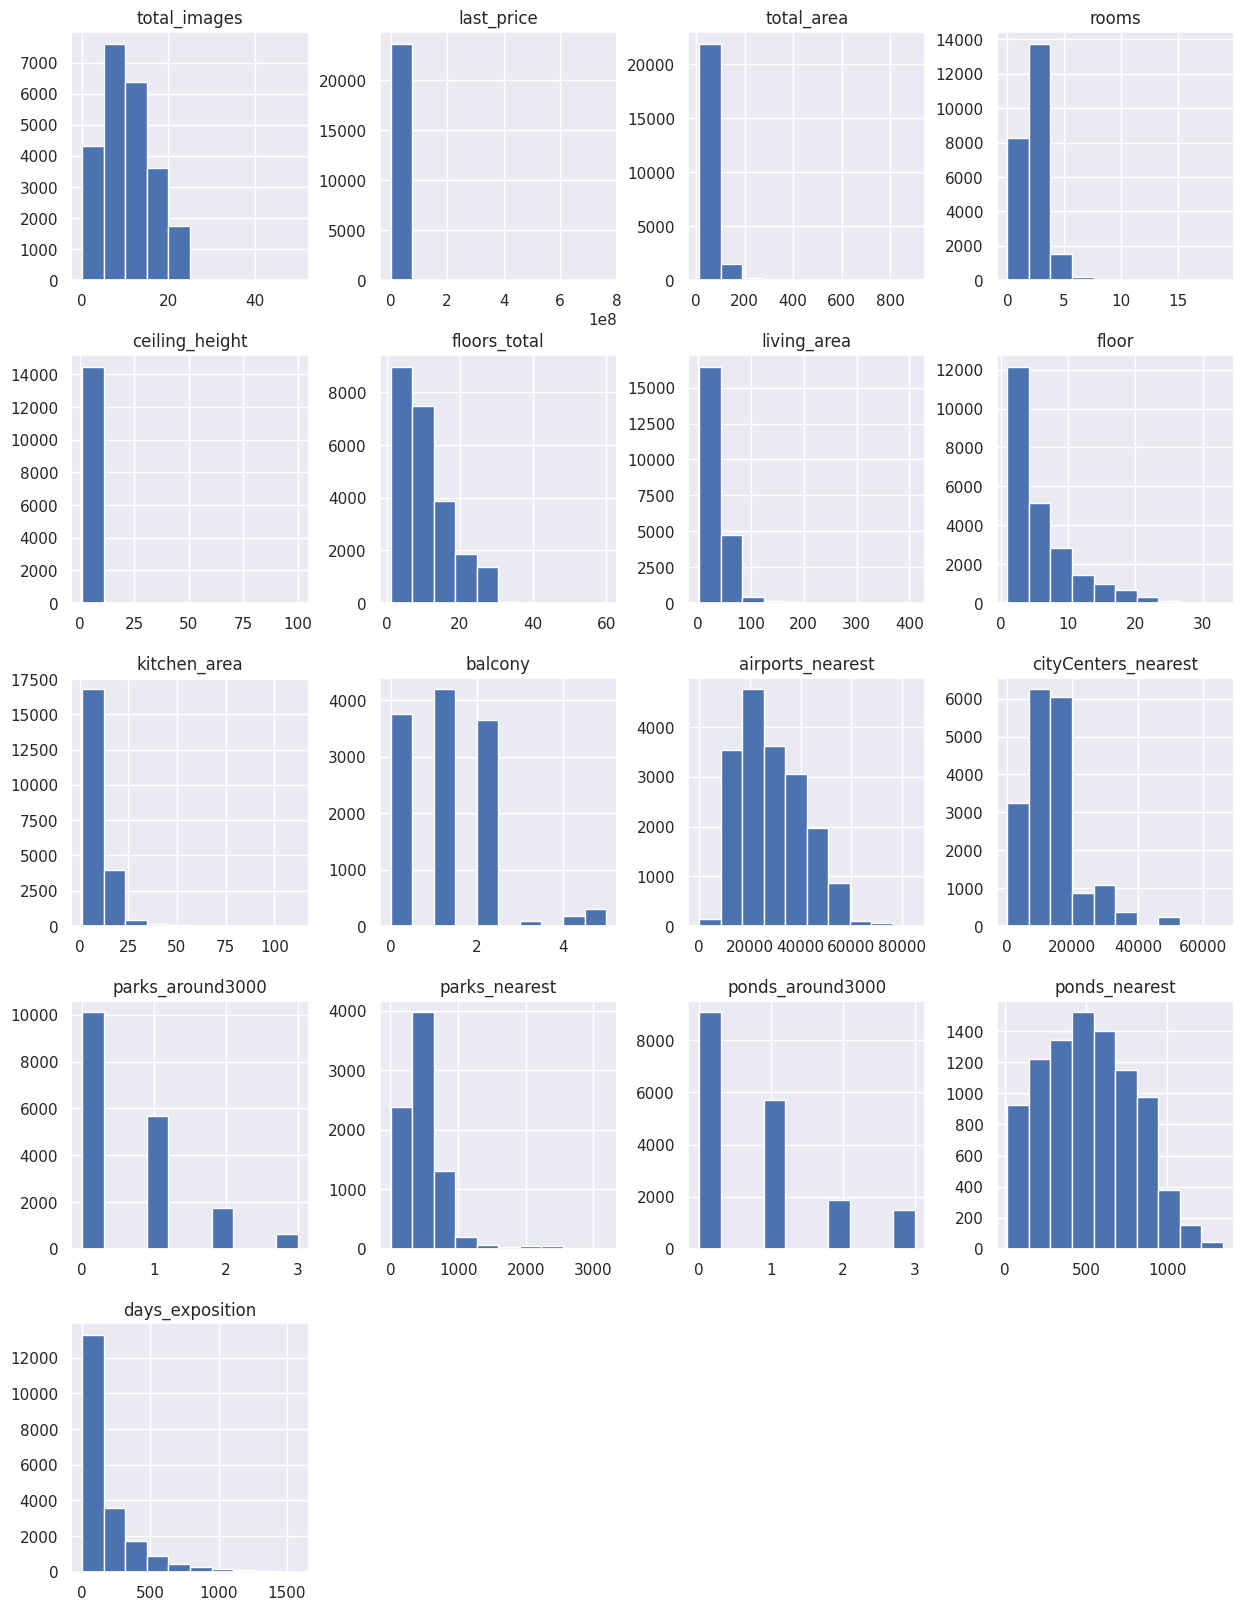

In [5]:
data.hist(figsize=(15, 20));

Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

### Предобработка данных

In [6]:
#Посмотрим на количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**2.1. Пропущенные значения**

**Работа с пропущенными значениями**

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения в данных, %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

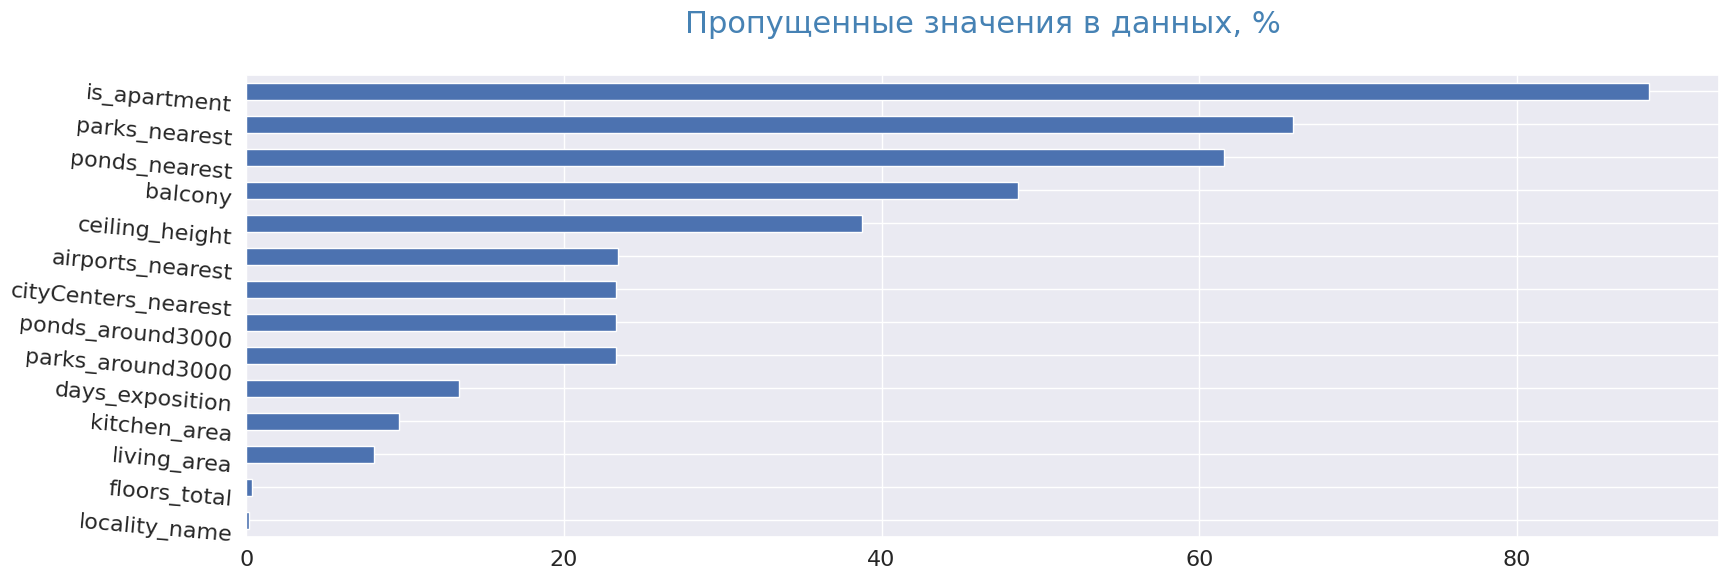

In [8]:
pass_value_barh(data)

**Высота потолков (ceiling_height)**

In [9]:
print('Количество пропусков по высоте потолков:', data['ceiling_height'].isnull().sum())

Количество пропусков по высоте потолков: 9195


In [10]:
# обработаем пропущенные значения так: сделаем замену на медиану для зданий конкретной этажности (либо на общую медиану).
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [11]:
# заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()[5]

# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

# смотрим на количество пропущенных значений после замены
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

**Число этажей в доме (floors_total)**

In [12]:
print('Количество пропусков по числу этажей в доме:', data['floors_total'].isnull().sum())

Количество пропусков по числу этажей в доме: 86


Число этажей в доме. Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. Данные могут отсутствать по причине необязательности заполнения этих столбцов.

In [13]:
data.dropna(subset=['floors_total'], inplace=True)

**Жилая площадь и площадь кухни (living_area, kitchen_area)**

In [14]:
print('Количество пропусков по площади кухни:', data['kitchen_area'].isnull().sum())
print('Количество пропусков по жилой площади:', data['living_area'].isnull().sum())

Количество пропусков по площади кухни: 2231
Количество пропусков по жилой площади: 1870


Данные важны, но проставлять среднее было бы некорректно. И в дальних районах может быть жилье огромных размеров или квартира 40 кв.м., из которых 35 - кухня.

In [15]:
#Проверим предположение, что именно по студиям не указана эта информация:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    194
living_area      11
dtype: int64

Предположение не подтвердилось, лишь малая часть пропусков по этим столбцам относится к студиям. Оставляем все как есть.

**Число балконов: (balcony)**

In [16]:
print('Количество пропусков по числу балконов:', data['balcony'].isnull().sum())

Количество пропусков по числу балконов: 11480


In [17]:
#заменим пропуски в balcony на 0
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().value_counts()

False    23613
Name: balcony, dtype: int64

**Название населенного пункта (locality_name)**

In [18]:
print('Количество пропусков по названию населенного пункта:', data['locality_name'].isnull().sum())

Количество пропусков по названию населенного пункта: 48


In [19]:
#Удалим строки с пропущенными значениями
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().value_counts()

False    23565
Name: locality_name, dtype: int64

**Расстояние до центра города (cityCenters_nearest)**

In [20]:
print('Количество пропусков по расстоянию до центра города:', data['cityCenters_nearest'].isnull().sum())

Количество пропусков по расстоянию до центра города: 5501


**Длительность размещения объявления (days_exposition)**

In [21]:
print('Количество пропусков по длительности размещения объявления:', data['days_exposition'].isnull().sum())

Количество пропусков по длительности размещения объявления: 3171


Пропуски в этом столбце говорят нам о том, что квартиры еще не проданы. Оставим этот столбец как есть

**2.2. Замена типов данных**

In [22]:
#переведем столбец с датой публикации объявления в формат даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
#заменим тип данных на int в столбце balcony и floors_total
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [24]:
# для удобства заменим тип данных на int в столбцах days_exposition, last_price и floors_total
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

**2.3. Ищем дубликаты**

In [25]:
data.duplicated().sum()

0

Посмотрим на уникальные значения в столбцах с названиями, попробуем найти неявные дубликаты и обработать их

In [26]:
data['locality_name'].nunique()

364

Воспользуемся модулем для регулярных выражений re, с его помощью создадим новый столбец с краткими названиями населенных пунктов

In [27]:
data['locality_name_short'] = data.locality_name\
  .apply(lambda x: re.sub(r"\b[а-я]+\b", '', x.replace('ё', 'е')))\
  .map(str.strip)

In [28]:
data['locality_name_short'].nunique()

305

In [29]:
# check
data.locality_name_short.unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [30]:
#Уберем лишний символ в значении 'Платформа 69-'
data['locality_name_short'] = data['locality_name_short'].replace('Платформа 69-', 'Платформа 69')

In [31]:
data.locality_name_short.unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [32]:
# check
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**2.4. Обработка аномальных значений**

In [33]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.735737,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.996999,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [34]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'mean', 'median', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","21,700.00","21,343.00","23,565.00","23,565.00"
mean,2.07,60.32,2.74,156.42,"6,540,058.26",34.45,10.56,5.88,10.68
median,2.00,52.00,2.65,73.00,"4,646,000.00",30.00,9.10,4.00,9.00
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


Создадим функцию, определяющую границы "усов" для задаваемого признака

Посмотрим на каждый столбец отдельно

**Комнаты**

In [35]:
data.rooms.value_counts().to_frame()

,rooms
1,8004
2,7897
3,5779
4,1172
5,325
0,194
6,104
7,59
8,12
9,8


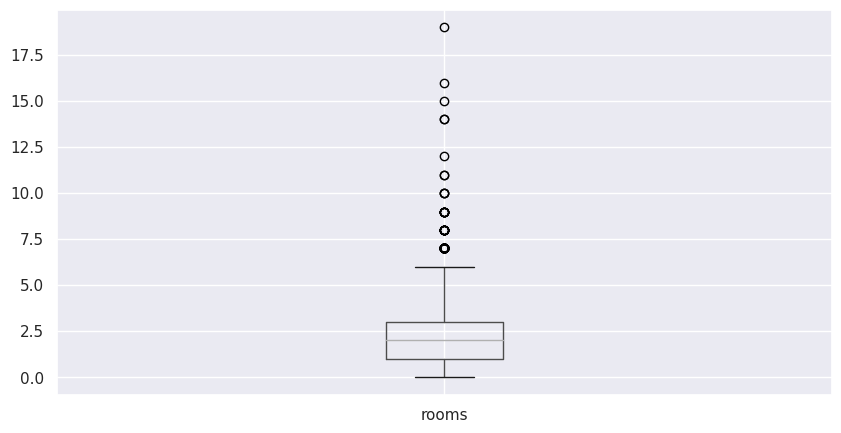

In [36]:
plt.figure(figsize = (10,5))
data.boxplot(column='rooms');

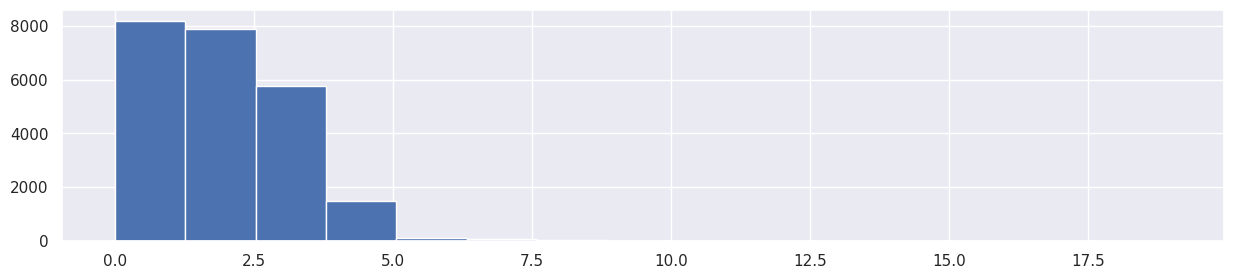

In [37]:
data.rooms.hist(bins = 15, figsize = (15,3));

Значения выглядят нормально. Число комнат 0, это скорее всего студии. Число комнат 19, - возможно, это общежития или нежилые помещения. Видим выбросы со значениями больше 7 комнат, уберем лишние данные

In [38]:
data = data[data['rooms'] < 7]

**Общая площадь**

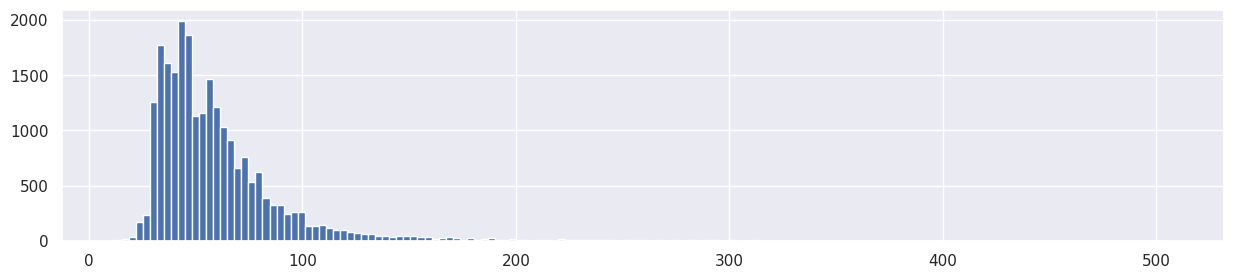

In [39]:
data.total_area.hist(bins = 150, figsize = (15,3));

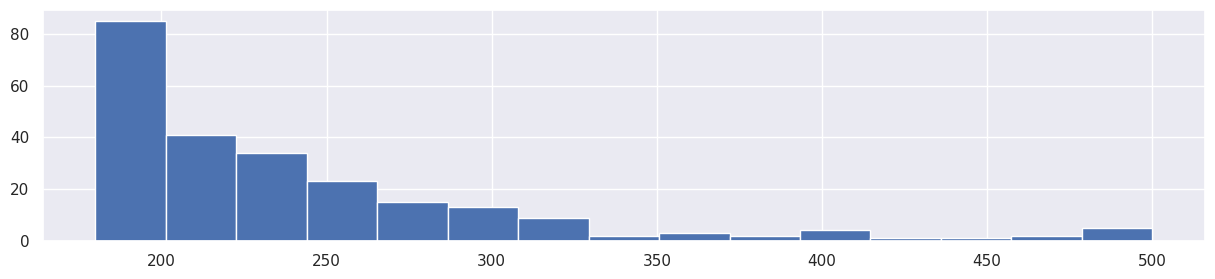

In [40]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

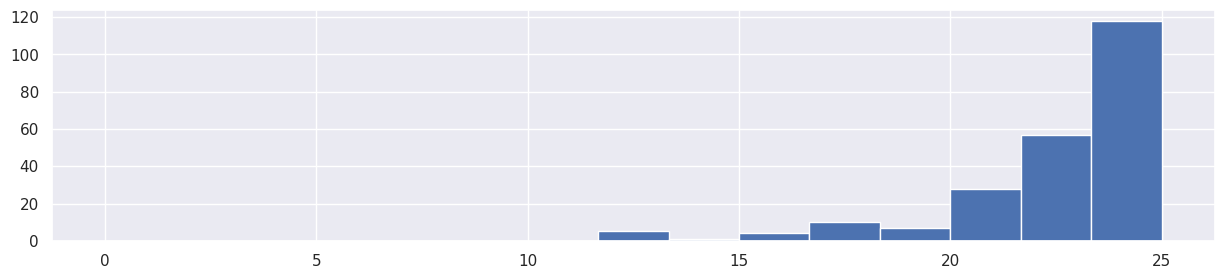

In [41]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

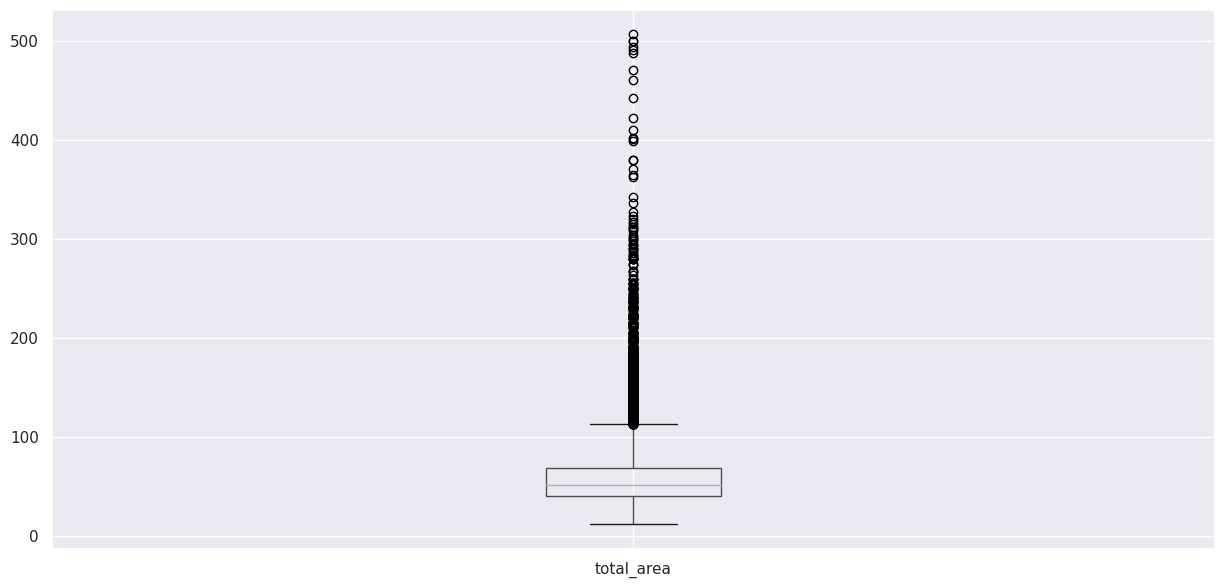

In [42]:
plt.figure(figsize = (15,7))
data.boxplot(column='total_area');

Квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкими для нашего исследования значениями и удалить их

In [43]:
data = data[(data['total_area'] > 20) & (data['total_area'] < 250)]

**Высота потолков**

In [44]:
data.ceiling_height.value_counts().to_frame()

,ceiling_height
2.55,4272
2.50,3511
2.70,3251
2.75,2409
2.60,2286
...,...
5.30,1
14.85,1
2.20,1
4.37,1


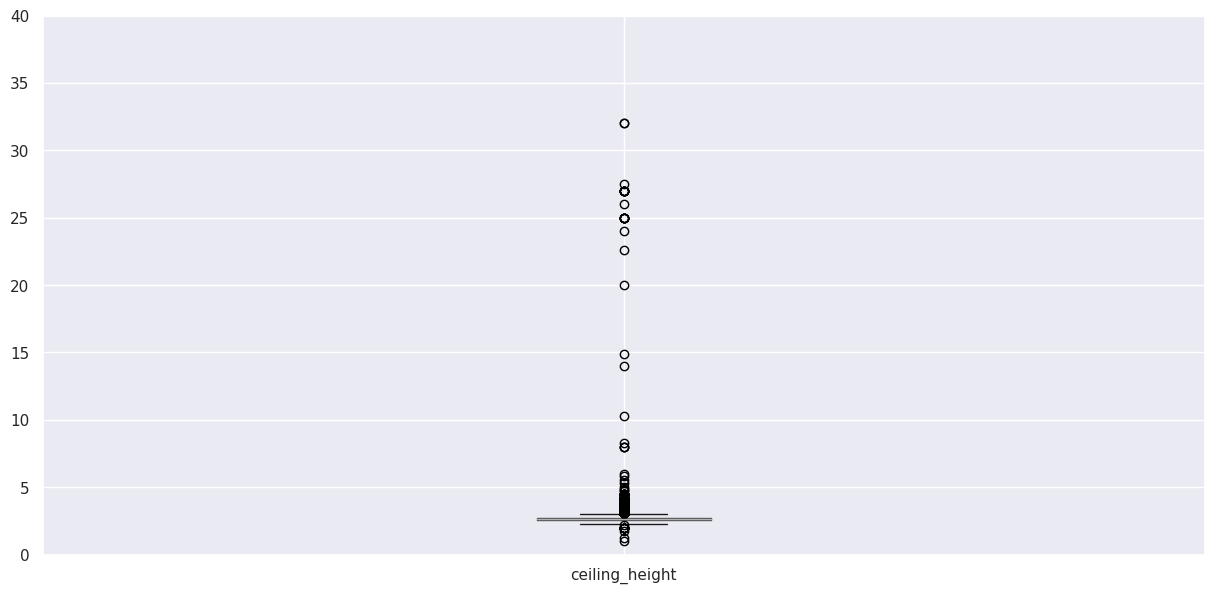

In [45]:
plt.figure(figsize = (15,7))
plt.ylim(0, 40) 
data.boxplot(column='ceiling_height');

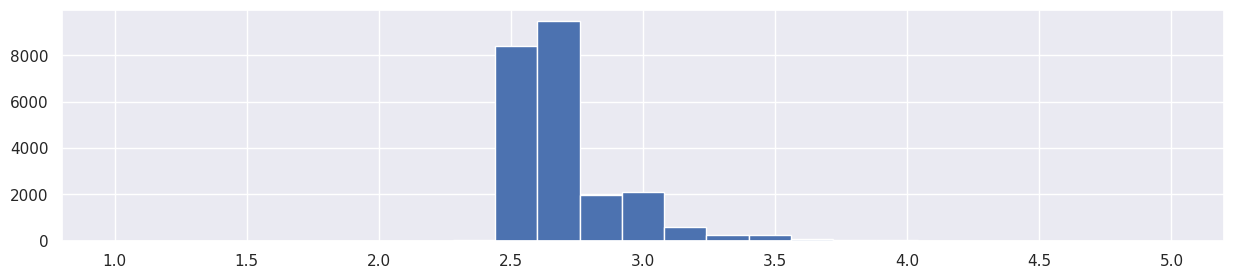

In [46]:
data.ceiling_height.hist(bins = 25, figsize = (15,3), range=(1,5));

По гистограмме видим, что самые распространенные значения находятся в диапазоне от 2.4м до 3.25м. С другой стороны, насколько мне известно, в Питере довольно много квартир с высотой потолков 4-6 метров. Исходя из этого, я бы убрал только совсем экстремальные значения

In [47]:
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 6)]

In [48]:
data.ceiling_height.value_counts().to_frame()

,ceiling_height
2.55,4272
2.50,3511
2.70,3251
2.75,2409
2.60,2286
...,...
3.84,1
4.30,1
3.39,1
4.40,1


**Сколько дней было размещено объявление (от публикации до снятия)**

In [49]:
data.days_exposition.value_counts().to_frame()

,days_exposition
0,3124
45,876
60,538
7,230
30,207
...,...
978,1
822,1
734,1
1037,1


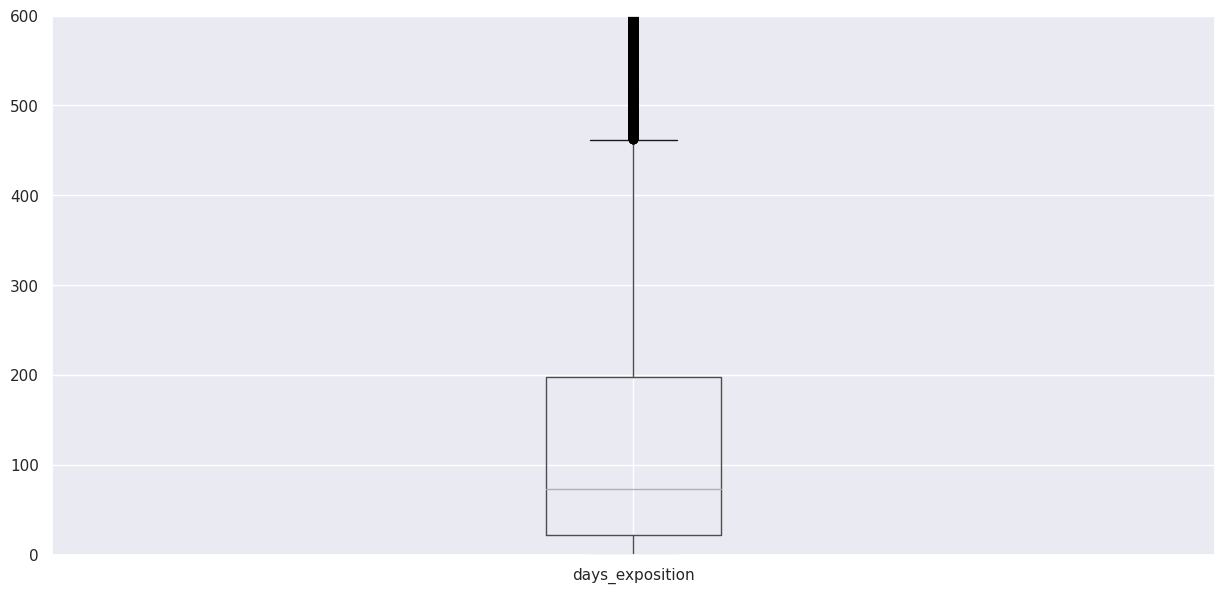

In [50]:
plt.figure(figsize = (15,7))
plt.ylim(0, 600) 
data.boxplot(column='days_exposition');

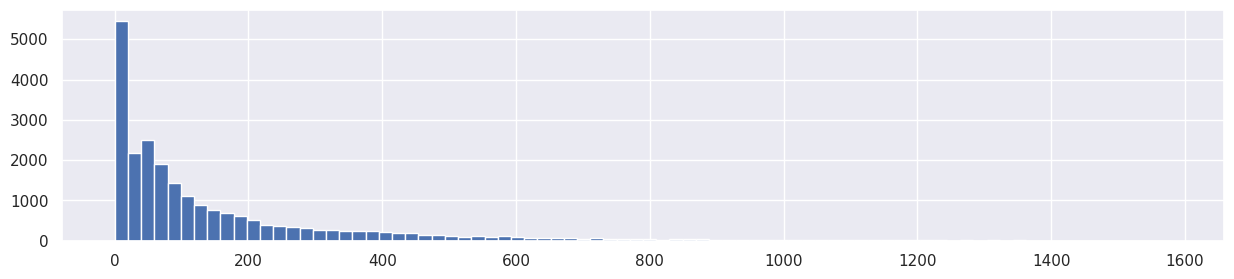

In [51]:
data.days_exposition.hist(bins = 80, figsize = (15,3));

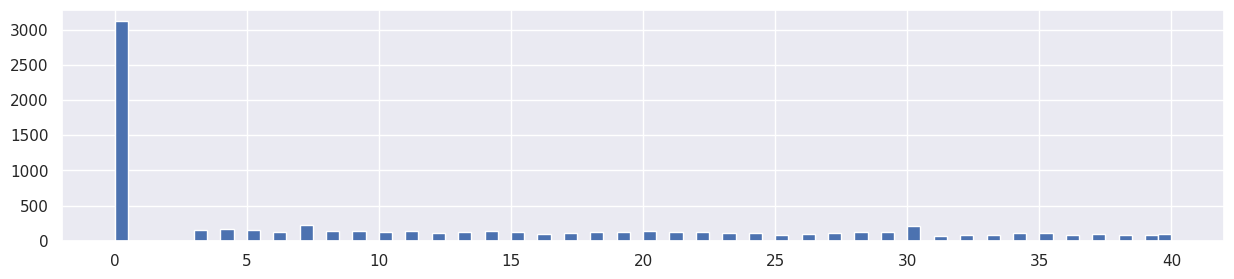

In [52]:
data.days_exposition.hist(bins = 80, figsize = (15,3), range = (0,40));

В нашем случае объявления, срок которых больше 1200, являются выбросами. Так же есть аномальные значения срока продажи квартиры за 0 и 1 день. Избавимся от них

In [53]:
data = data[
    ((data['days_exposition'] > 2) & (data['days_exposition'] <= 1200)) | data['days_exposition'].isna() 
]


In [54]:
(
    data[['days_exposition']]
    .apply(['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,days_exposition
count,"20,115.00"
min,3.00
max,"1,200.00"


Цена объекта

In [55]:
data.last_price.value_counts().to_frame()

,last_price
4500000,299
3500000,262
4000000,236
4200000,232
3600000,231
...,...
7563000,1
9290000,1
9480000,1
10480000,1


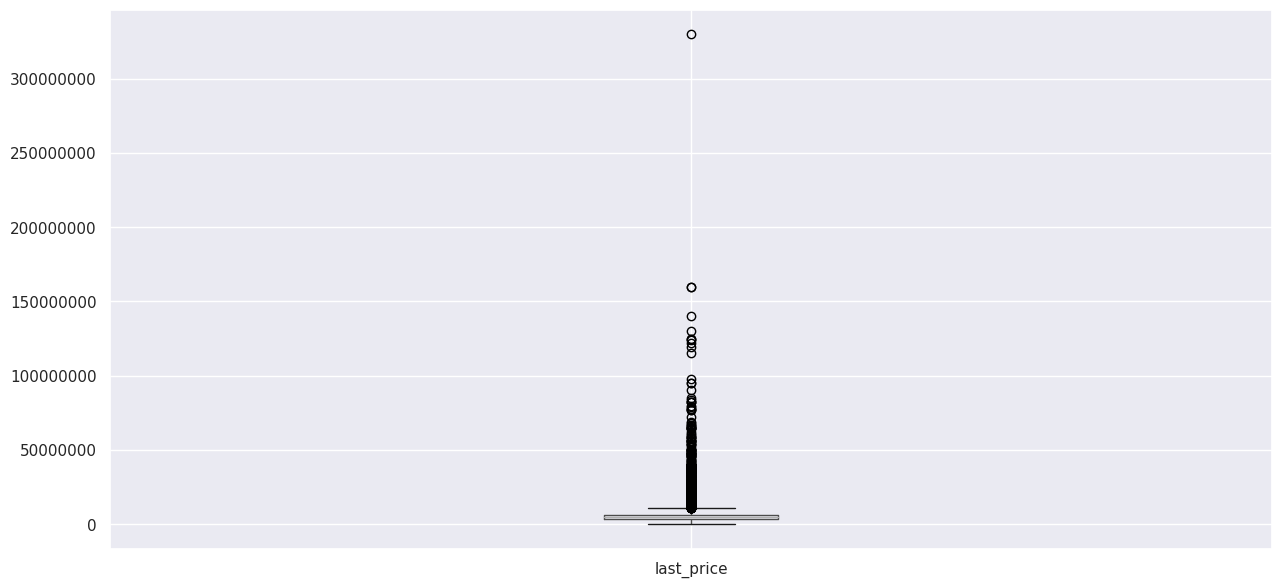

In [56]:
plt.figure(figsize = (15,7))
plt.ticklabel_format(style='plain') 
data.boxplot(column='last_price');

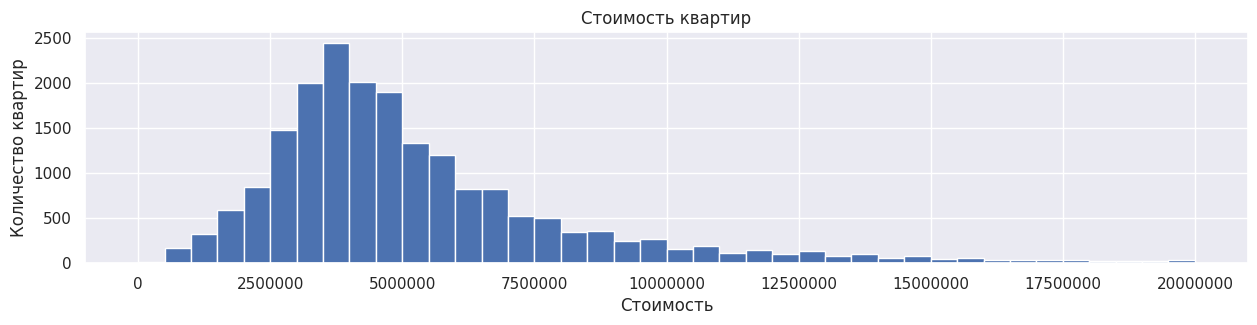

In [57]:
plt.figure(figsize = (15,3))
plt.ticklabel_format(style='plain') 
plt.hist(data['last_price'], bins=40, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

В основном стоимость квартир - порядка 5 миллионов. Больше 15 миллионов вариантов мало. Вариант жилья за 12190 очень подозрительный, избавимся от него

In [58]:
data = data[(data['last_price'] >= 400000) & (data['last_price'] <= 15_000_000)]

**Жилая площадь**

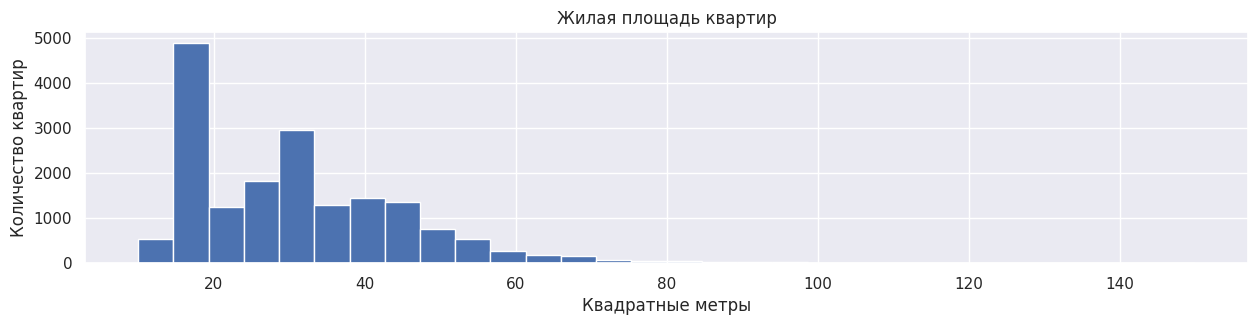

count    17843.000000
mean        31.104606
std         14.692536
min          2.000000
25%         18.000000
50%         29.200000
75%         40.000000
max        160.000000
Name: living_area, dtype: float64

In [59]:
plt.figure(figsize = (15,3))
plt.hist(data['living_area'], bins=30, range=(10,150))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].describe()

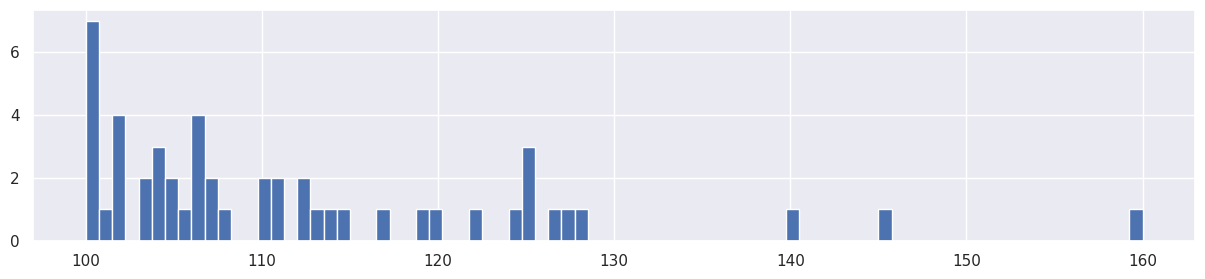

In [60]:
data.living_area.hist(bins = 80, figsize = (15,3), range = (100,160));

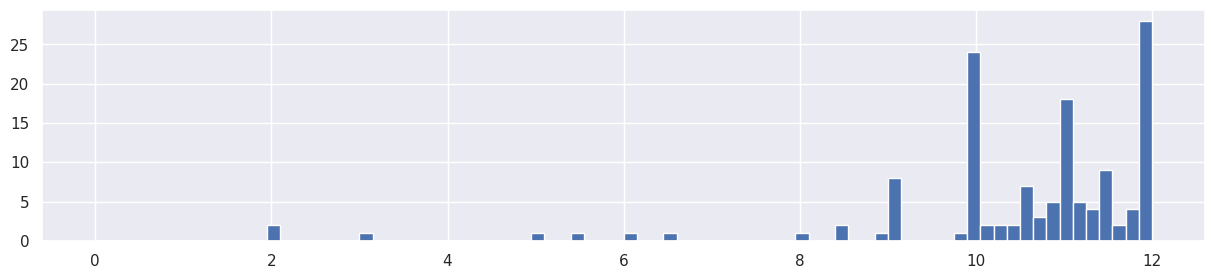

In [61]:
data.living_area.hist(bins = 80, figsize = (15,3), range = (0,12));

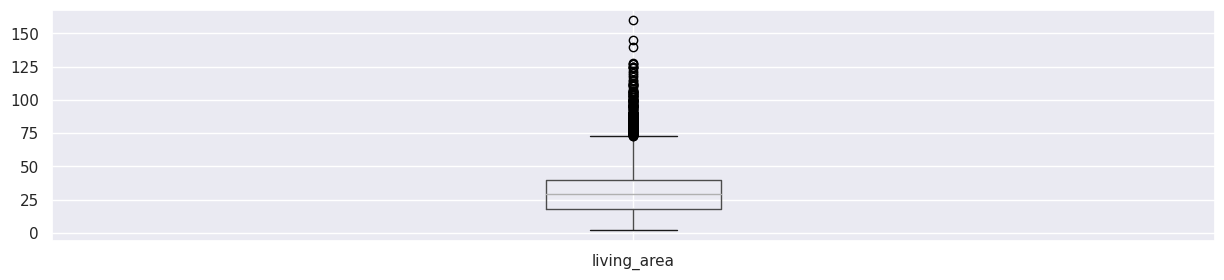

In [62]:
plt.figure(figsize = (15,3))
data.boxplot(column='living_area');

Видим, что значения, превышающие жилую площадь в 130, довольно редки. Так же есть странные маленькие значения жилой площади. Избавимся от них

In [63]:
data = data[
    ((data['living_area'] > 6) & (data['living_area'] <= 130)) | data['living_area'].isna() 
]

In [64]:
(
    data[['living_area']]
    .apply(['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,living_area
count,"17,834.00"
min,6.50
max,128.00


**Площадь кухни**

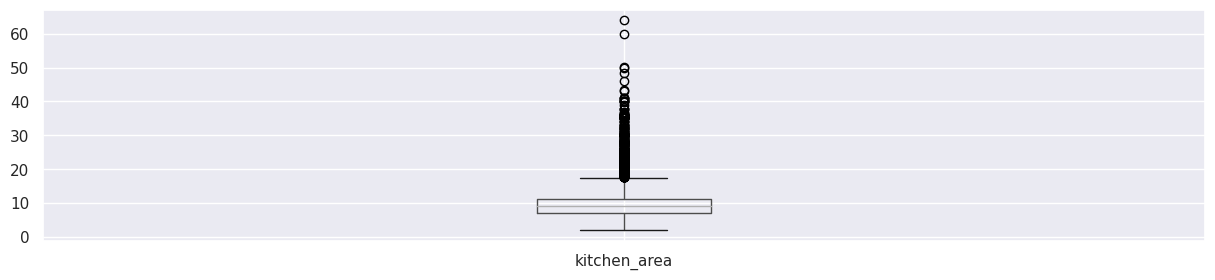

In [65]:
plt.figure(figsize = (15,3))
data.boxplot(column='kitchen_area');

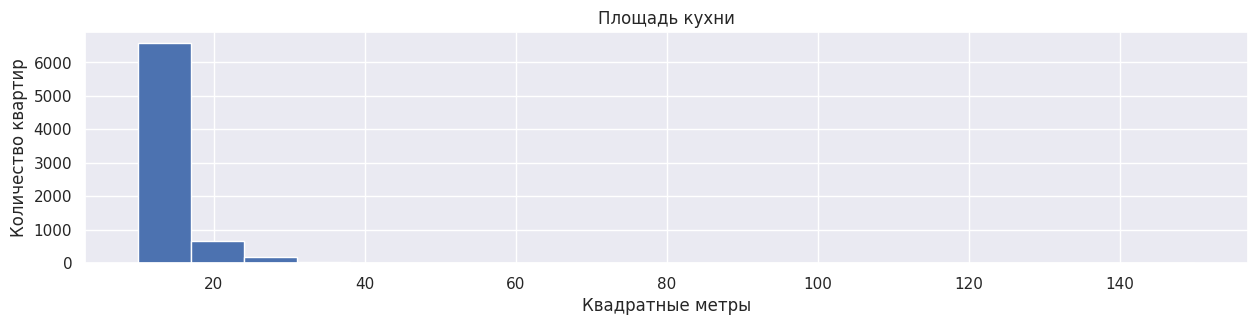

count    17493.000000
mean         9.842277
std          4.126412
min          2.000000
25%          7.000000
50%          9.000000
75%         11.200000
max         64.000000
Name: kitchen_area, dtype: float64

In [66]:
plt.figure(figsize = (15,3))
plt.hist(data['kitchen_area'], bins=20, range=(10,150))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].describe()

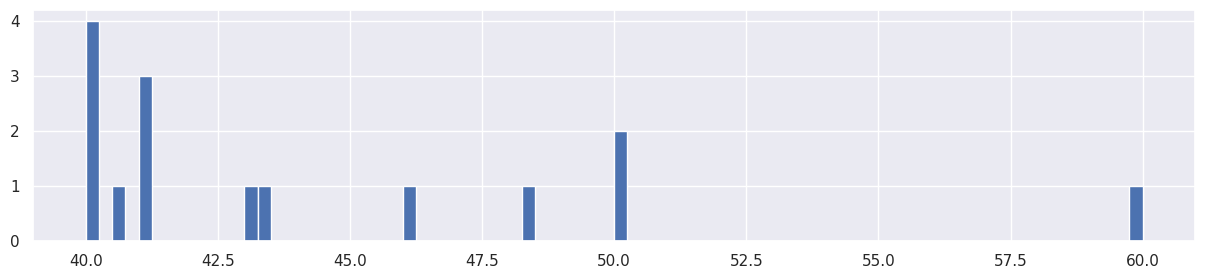

In [67]:
data.kitchen_area.hist(bins = 80, figsize = (15,3), range = (40,60));

Уберем значения, превышающие площадь кухни в 50, они больше похожи на выбросы

In [68]:
data = data[
    (data['kitchen_area'] <= 50) | data['kitchen_area'].isna() 
]

In [69]:
(
    data[['kitchen_area']]
    .apply(['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,kitchen_area
count,"17,490.00"
min,2.00
max,50.00


**Этаж квартиры и количество этажей в доме**

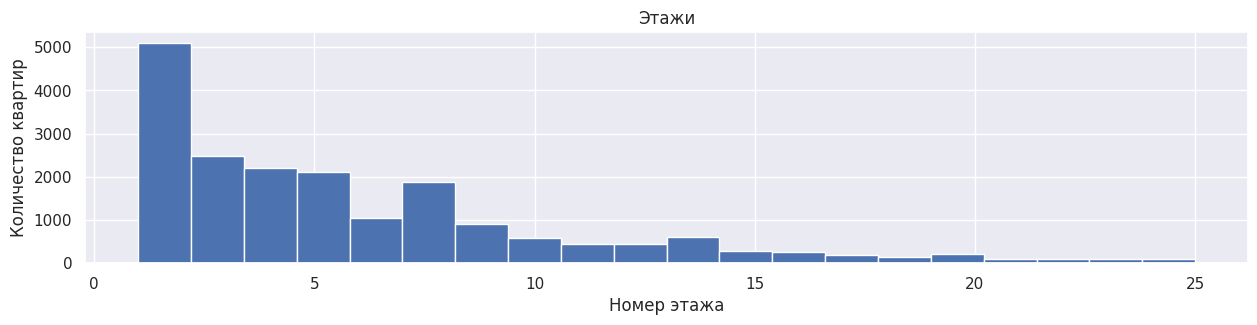

count    19389.000000
mean         5.985198
std          4.944205
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [70]:
plt.figure(figsize = (15,3))
plt.hist(data['floor'], bins=20, range=(1,25))
plt.title('Этажи')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()
data['floor'].describe()

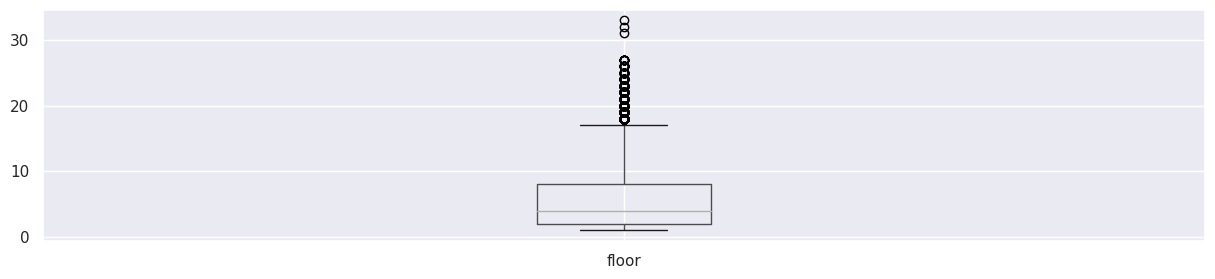

In [71]:
plt.figure(figsize = (15,3))
data.boxplot(column='floor');

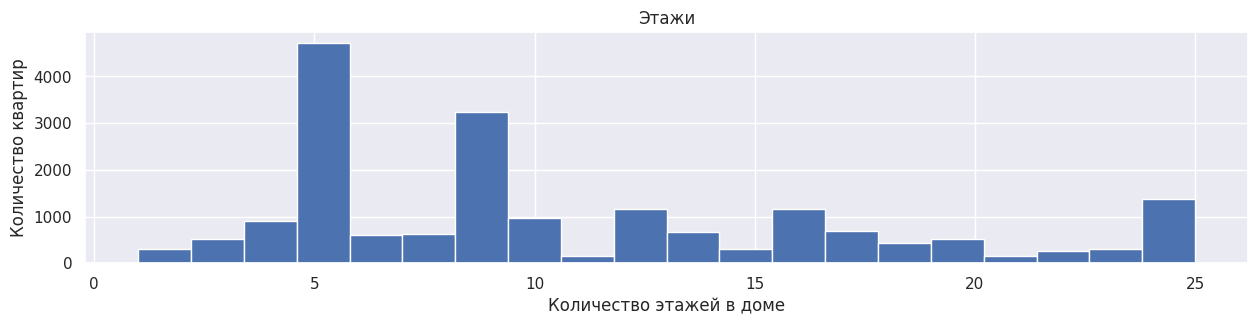

count    19389.000000
mean        10.951158
std          6.681875
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [72]:
plt.figure(figsize = (15,3))
plt.hist(data['floors_total'], bins=20, range=(1,25))
plt.title('Этажи')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()
data['floors_total'].describe()

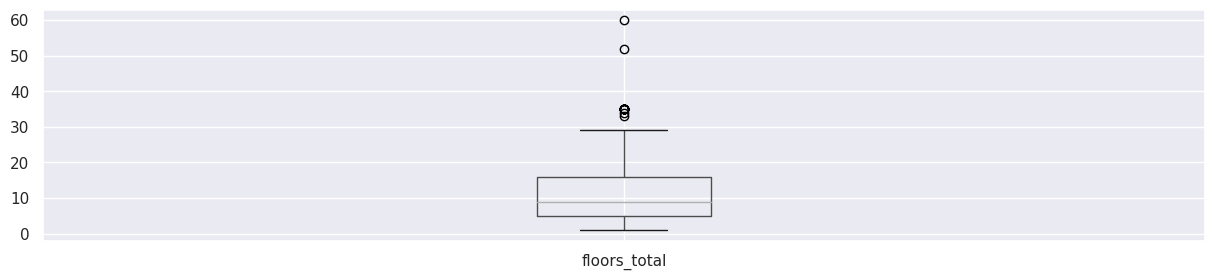

In [73]:
plt.figure(figsize = (15,3))
data.boxplot(column='floors_total');

Здания с количество этажей больше похожи на выбросы, удалим их

In [74]:
data = data[data['floors_total'] <= 50]

Не думаю, что стоит менять значения в столбце floor, они выглядят адекватно

Проверим какие аномалии остались

In [75]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"19,387.00","19,387.00","19,387.00","19,387.00","19,387.00","17,829.00","17,488.00","19,387.00","19,387.00"
min,0.00,20.10,2.00,3.00,"430,000.00",6.50,2.00,1.00,1.00
max,6.00,238.26,5.80,"1,200.00","15,000,000.00",128.00,50.00,33.00,35.00


Предобработка данных завершена, теперь можно перейти к исследованию данных

### Добавим в таблицу новые столбцы, которые пригодятся для анализа данных

In [76]:
#Цена квадратного метра:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1)

#День недели, месяц и год публикации объявления:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#Расстояние до центра города в километрах:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [77]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

###Исследовательский анализ данных

**Изучим следующие параметры объектов и построим отдельные гистограммы для каждого из этих параметров:**




<div>

* <b>общая площадь</b>
    
* <b>жилая площадь</b> 
    
* <b>площадь кухни</b> 

* <b>цена объекта</b> 

* <b>количество комнат</b> 

* <b>высота потолков</b> 
    
* <b>этаж квартиры</b> 
    
* <b>тип этажа квартиры («первый», «последний», «другой»)</b> 
    
* <b>общее количество этажей в доме</b> 
    
* <b>расстояние до центра города в метрах</b> 
    
* <b>расстояние до ближайшего аэропорта</b> 
    
* <b>расстояние до ближайшего парка</b> 
    

</div>

In [78]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_short,price_per_sqm,weekday,month,year,cityCenters_nearest_km,floor_category
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.6,1,NaN,...,0.0,NaN,81,Шушары,82920.8,1,12,2018,19.0,первый
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.3,4,NaN,...,2.0,574.0,558,Санкт-Петербург,92785.7,3,8,2015,14.0,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121,Санкт-Петербург,100000.0,1,6,2018,8.0,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.4,5,NaN,...,NaN,NaN,55,Янино-1,95065.8,0,9,2018,NaN,другой
6,6,3700000,37.30,2017-11-02,1,2.66,26,10.6,6,NaN,...,0.0,NaN,155,Парголово,99195.7,3,11,2017,19.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,NaN,...,1.0,806.0,519,Санкт-Петербург,129904.0,3,10,2016,4.0,другой
23692,2,1350000,30.00,2017-07-07,1,2.55,5,17.5,4,NaN,...,NaN,NaN,413,Тихвин,45000.0,4,7,2017,NaN,другой
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.0,8,NaN,...,1.0,675.0,239,Петергоф,73717.9,4,8,2016,34.0,другой
23695,14,3100000,59.00,2018-01-15,3,2.55,5,38.0,4,NaN,...,NaN,NaN,45,Тосно,52542.4,0,1,2018,NaN,другой


**Общая площадь**

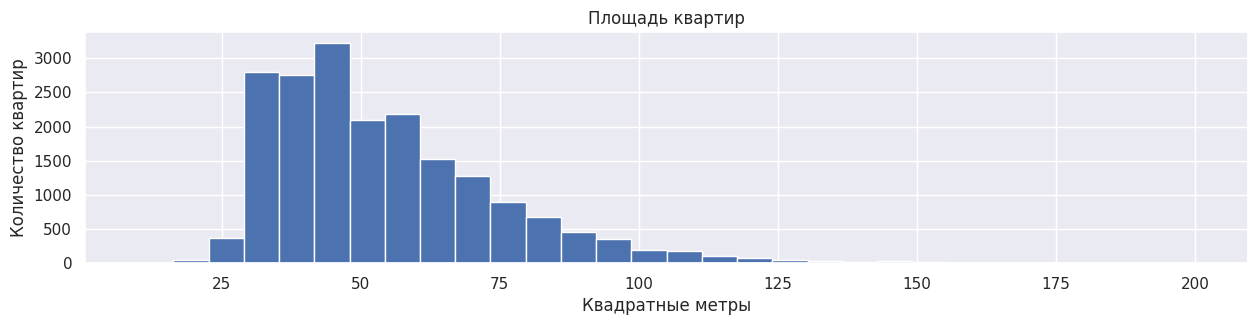

count    19387.00000
mean        54.41840
std         21.15615
min         20.10000
25%         39.00000
50%         49.76000
75%         64.80000
max        238.26000
Name: total_area, dtype: float64

In [79]:
plt.figure(figsize = (15,3))
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].describe()

Большинство квартир - менее 65 квадратных метров, значительно реже встречаются варианты с площадью больше 100 кв.м.. Средняя площадь квартиры - 50 кв.м..

**Жилая площадь**

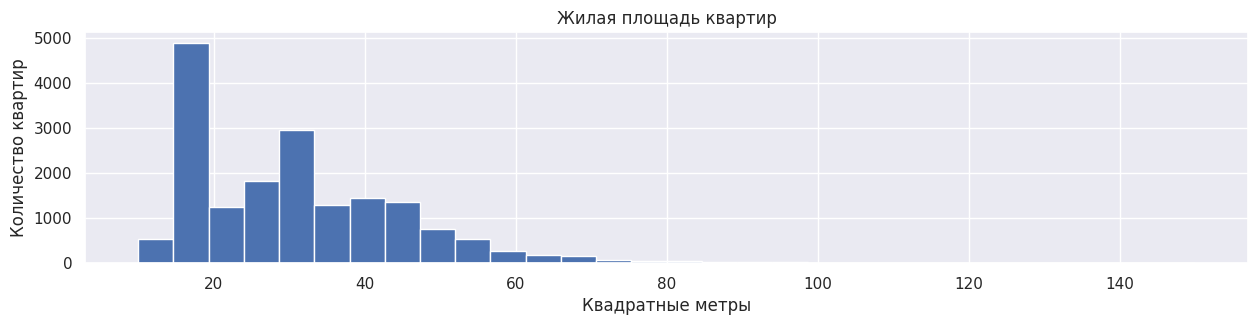

count    17829.000000
mean        31.093128
std         14.608149
min          6.500000
25%         18.000000
50%         29.200000
75%         40.000000
max        128.000000
Name: living_area, dtype: float64

In [80]:
plt.figure(figsize = (15,3))
plt.hist(data['living_area'], bins=30, range=(10,150))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].describe()

Среднее значение жилой площади площади - 29 кв.м.. Большинство квартир по значению жилой площади не привышают 40 кв.м.

**Площадь кухни**

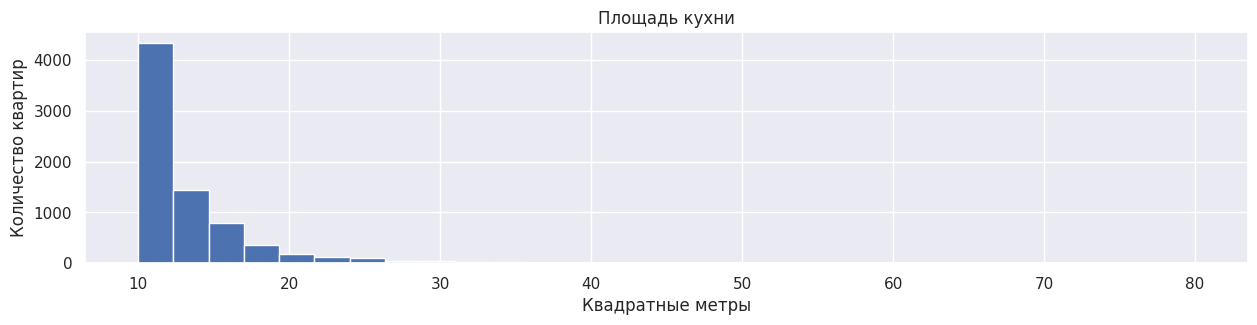

count    17488.000000
mean         9.833907
std          4.077501
min          2.000000
25%          7.000000
50%          9.000000
75%         11.200000
max         50.000000
Name: kitchen_area, dtype: float64

In [81]:
plt.figure(figsize = (15,3))
plt.hist(data['kitchen_area'], bins=30, range=(10,80))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].describe()

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

**Цена объекта**

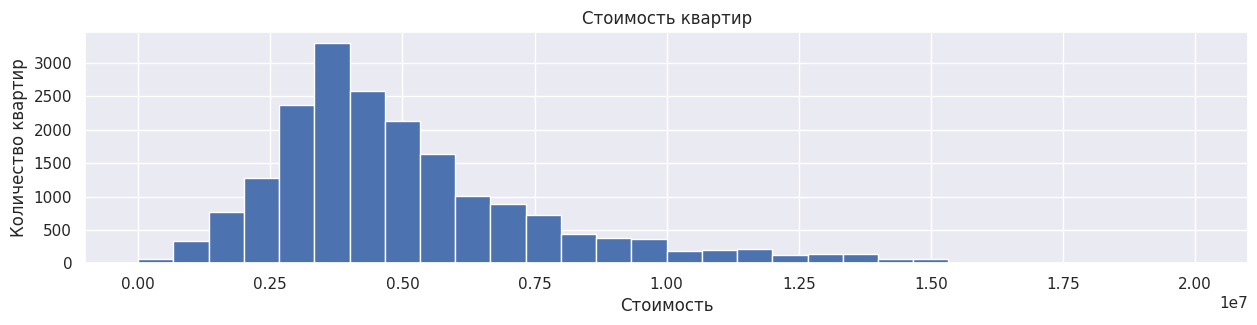

count    1.938700e+04
mean     5.052750e+06
std      2.608167e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.400000e+06
75%      6.100000e+06
max      1.500000e+07
Name: last_price, dtype: float64

In [82]:
plt.figure(figsize = (15,3))
plt.hist(data['last_price'], bins=30, range=(10,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].describe()

В основном стоимость квартир - порядка 4.4 миллионов

**Количество комнат**

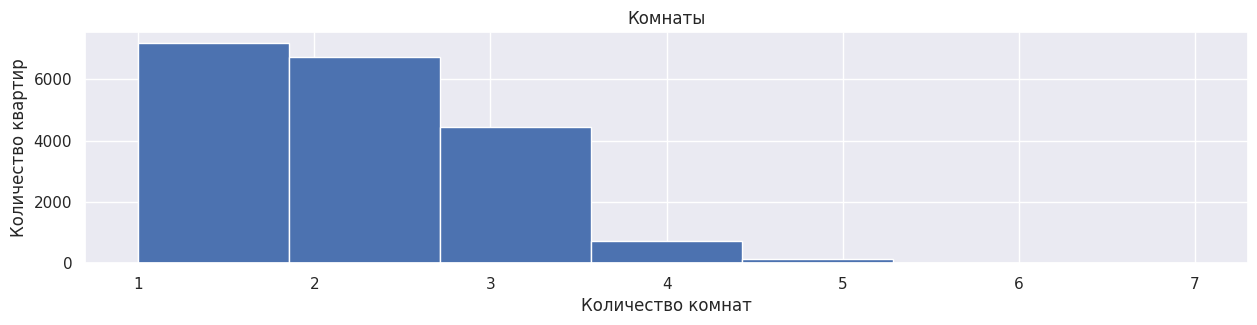

count    19387.000000
mean         1.943828
std          0.929747
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [83]:
plt.figure(figsize = (15,3))
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

В основном квартиры состоят из 1, 2 или 3 комнат. Есть небольшая доля 4-комнатных квартир.

**Высота потолков**

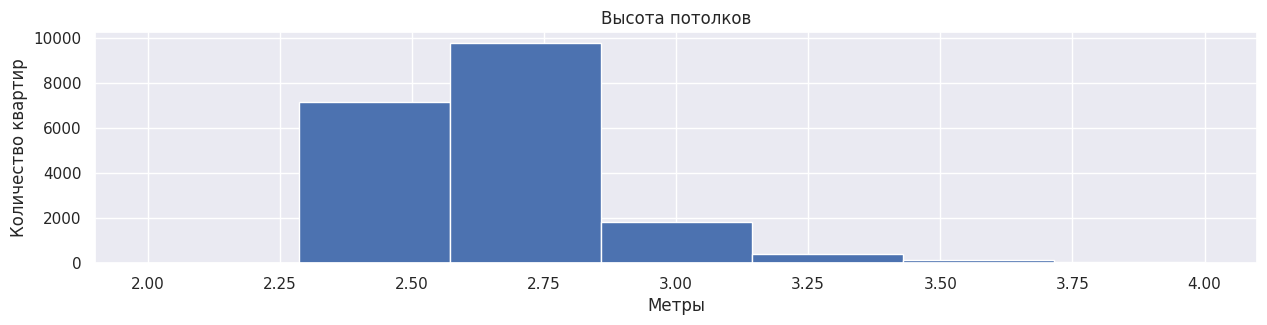

count    19387.000000
mean         1.943828
std          0.929747
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [84]:
plt.figure(figsize = (15,3))
plt.hist(data['ceiling_height'], bins=7, range=(2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

Высота потолков в среднем составляет 2 метра. Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.

**Этаж квартиры**

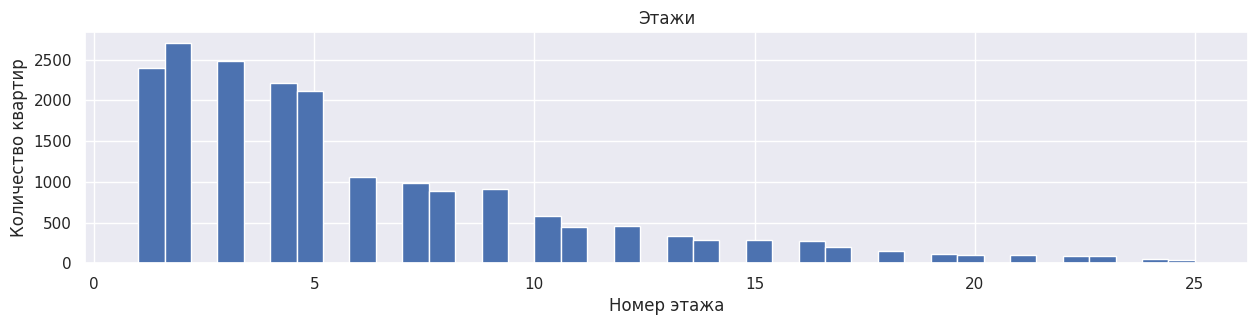

count    19387.000000
mean         5.984680
std          4.943686
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [85]:
plt.figure(figsize = (15,3))
plt.hist(data['floor'], bins=40, range=(1,25))
plt.title('Этажи')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()
data['floor'].describe()

Большинство квартир находятся на этажах с 1 по 10.

**Тип этажа квартиры («первый», «последний», «другой»)**

In [86]:
data['floor_category'].value_counts()

другой       14353
последний     2642
первый        2392
Name: floor_category, dtype: int64

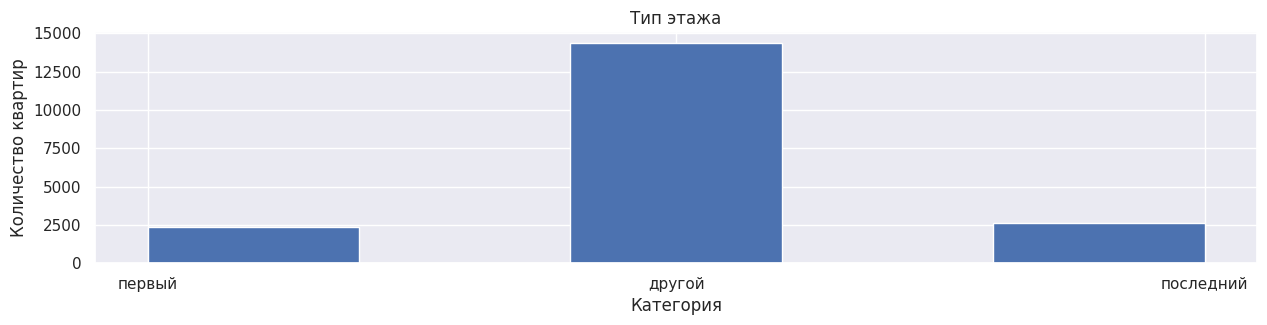

In [87]:
plt.figure(figsize = (15,3))
plt.hist(data['floor_category'], bins=5)
plt.title('Тип этажа')
plt.xlabel('Категория')
plt.ylabel('Количество квартир')
plt.show()

Около 2500 квартир находятся на первом и последнем этажах. Большинство квратир нахожятся на других этажах

**Общее количество этажей в доме**

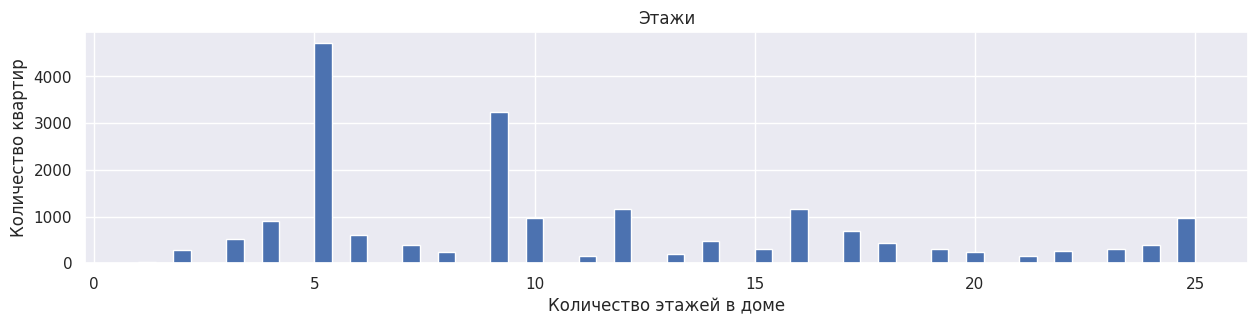

count    19387.000000
mean        10.946511
std          6.666410
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

In [88]:
plt.figure(figsize = (15,3))
plt.hist(data['floors_total'], bins=60, range=(1,25))
plt.title('Этажи')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()
data['floors_total'].describe()

In [89]:
data['floors_total'].value_counts()

5     4711
9     3236
12    1163
16    1157
10     978
25     975
4      903
17     696
6      611
3      521
14     484
18     440
24     399
7      393
15     304
23     302
19     297
2      286
22     257
8      238
20     231
13     189
11     151
21     149
27     146
26     112
1       20
35      18
28      17
34       1
29       1
33       1
Name: floors_total, dtype: int64

Как видим на графике, много квартир в пятиэтажных и девятиэтажных домах

**Расстояние до центра города в метрах**

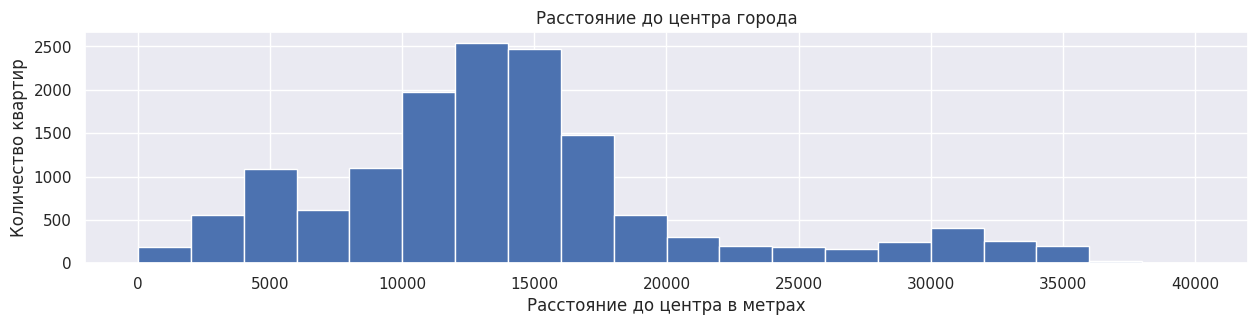

count    14790.000000
mean     14721.963556
std       8502.908317
min        208.000000
25%      10330.000000
50%      13417.000000
75%      16574.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [90]:
plt.figure(figsize = (15,3))
plt.hist(data['cityCenters_nearest'], bins=20, range=(1,40000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра в метрах')
plt.ylabel('Количество квартир')
plt.show()
data['cityCenters_nearest'].describe()

Большая часть квартир находится в диапазоне от 10 000м до 20 000м от центра города

**Расстояние до ближайшего аэропорта**

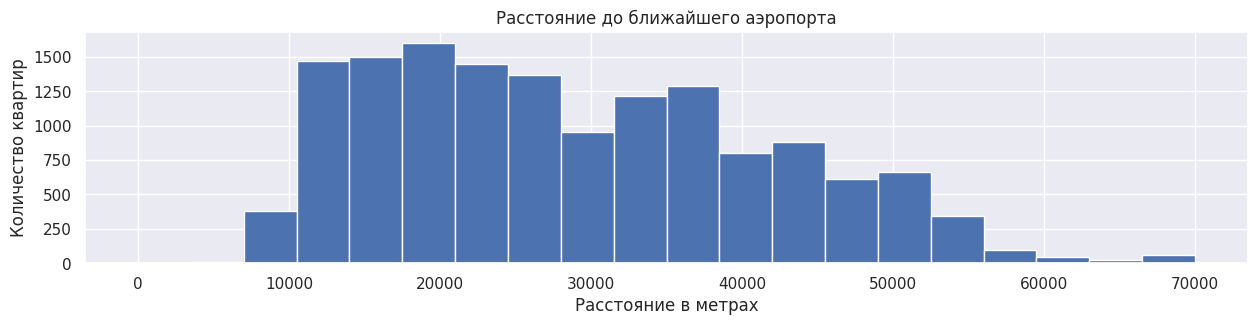

count    14774.000000
mean     28924.378503
std      12918.637721
min          0.000000
25%      18184.000000
50%      26995.000000
75%      37636.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [91]:
plt.figure(figsize = (15,3))
plt.hist(data['airports_nearest'], bins=20, range=(1,70000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
data['airports_nearest'].describe()

Большинство значений расстояния от ближайшего аэропорта сосредоточены в интервале от 10 до 60 км.

**Расстояние до ближайшего парка**

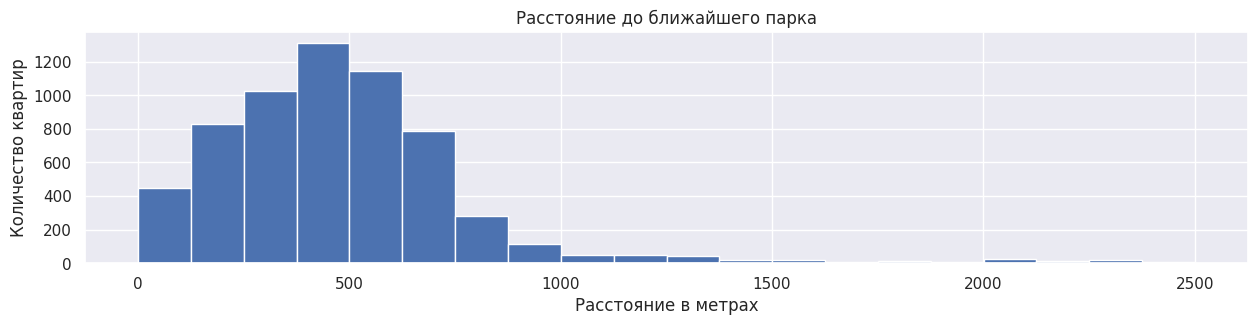

count    6216.000000
mean      490.236647
std       335.307139
min         1.000000
25%       288.000000
50%       455.000000
75%       614.250000
max      3190.000000
Name: parks_nearest, dtype: float64

In [92]:
plt.figure(figsize = (15,3))
plt.hist(data['parks_nearest'], bins=20, range=(1,2500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
data['parks_nearest'].describe()

Исходя из полученной гистограммы видим, что большнство парков находится на расстоянии не дальше, чем 1км. от квартиры

**День и месяц публикации объявления**

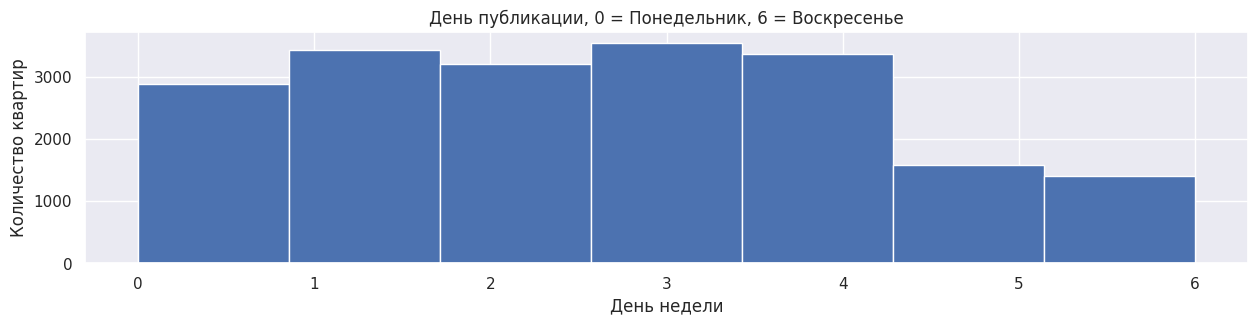

In [93]:
plt.figure(figsize = (15,3))
plt.hist(data['weekday'], bins=7)
plt.title('День публикации, 0 = Понедельник, 6 = Воскресенье')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

В будние дни размещено больше объявлений, чем в выходные

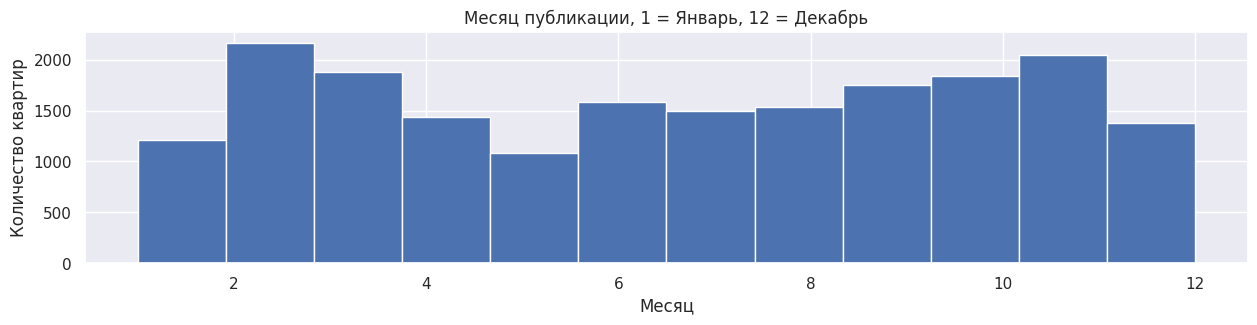

In [94]:
plt.figure(figsize = (15,3))
plt.hist(data['month'], bins=12)
plt.title('Месяц публикации, 1 = Январь, 12 = Декабрь')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

С февраля до мая количество объявления высокое. В мае их резко меньше, а затем к декабрю количество объявлений сново растет

**Выясним, сколько времени занимает продажа квартиры**

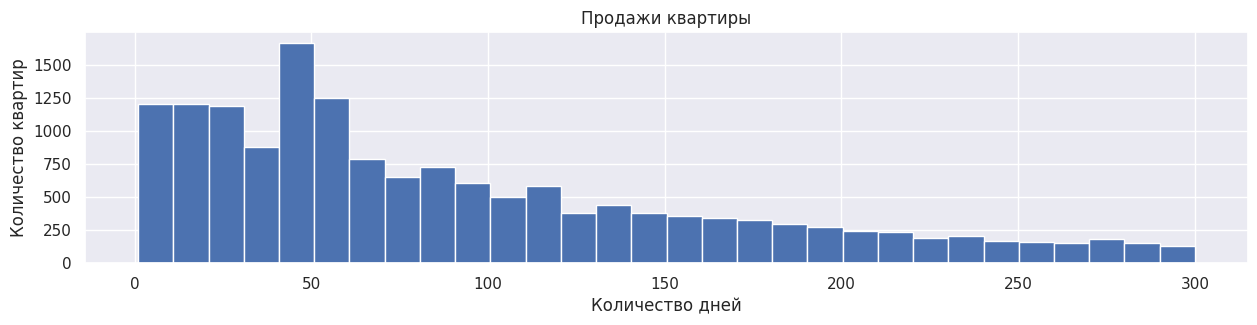

count    19387.000000
mean       171.891216
std        203.134978
min          3.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1200.000000
Name: days_exposition, dtype: float64

In [95]:
plt.figure(figsize = (15,3))
plt.hist(data['days_exposition'], bins=30, range=(1,300))
plt.title('Продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()
data['days_exposition'].describe()

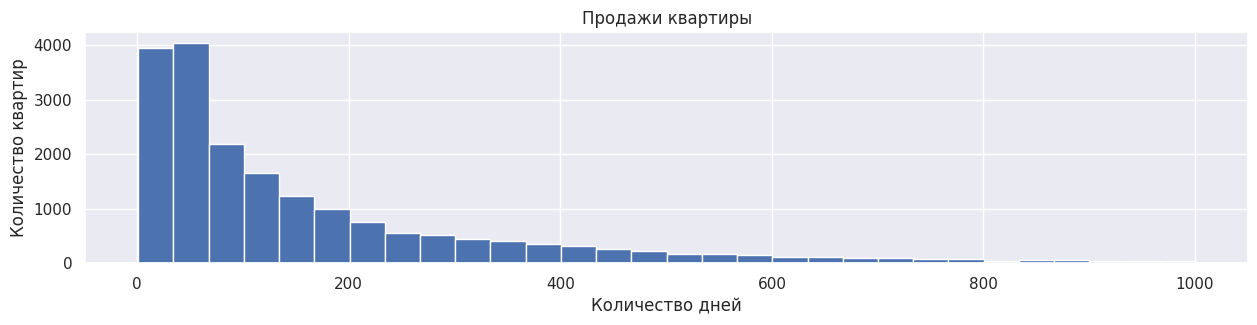

In [96]:
plt.figure(figsize = (15,3))
plt.hist(data['days_exposition'], bins=30, range=(1,1000))
plt.title('Продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

Среднее время продажи квартиры - 171 день, а медианное - 92. По полученным данным и гистограмме можно сказать, что быстрыми продажами являются те, которые были осуществленны в срок 44 дня и меньше. Долгие продажи - от 221 дня и дольше.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

С помощью графиков посмотрим, зависит ли цена от следующих параметров:

<div>

* <b>общая площадь;</b> 

* <b>жилая площадь;</b> 

* <b>площадь кухни;</b> 

* <b>количество комнат;</b> 

* <b>этаж, на котором расположена квартира (первый, последний, другой);</b> 

* <b>дата размещения (день недели, месяц, год).</b>
    

</div>









Зависимость цены от общей площади 



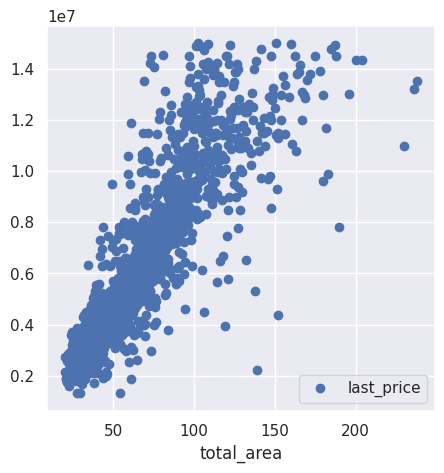

Зависимость цены от жилой площади 



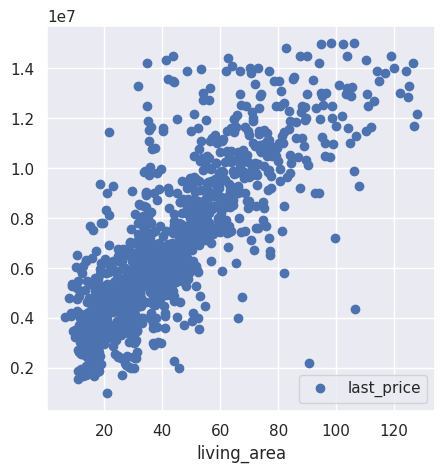

Зависимость цены от площади кухни 



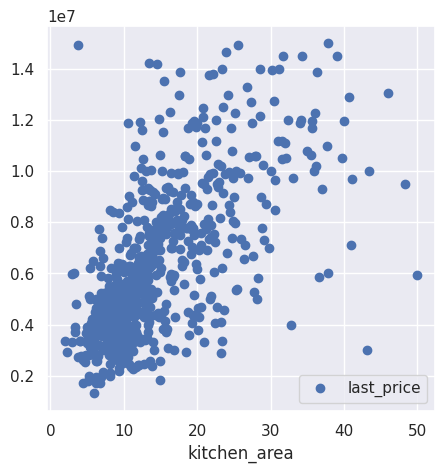

Зависимость цены от числа комнат 



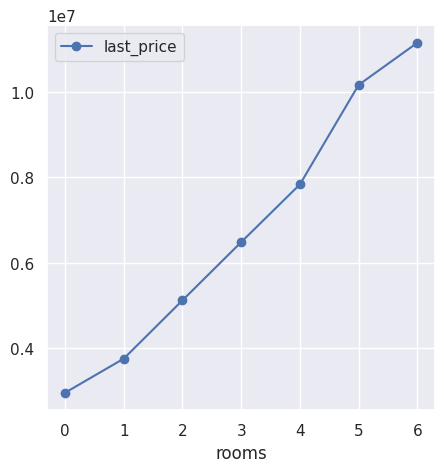

Категории этажей 



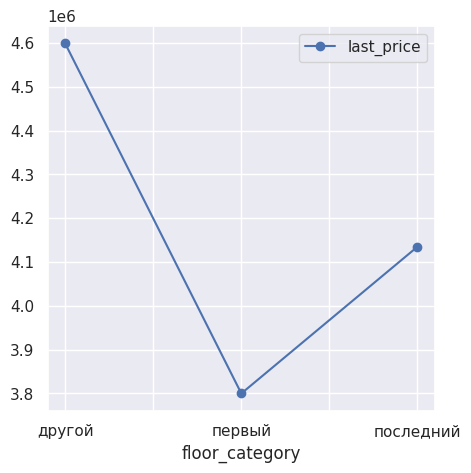

День размещения 



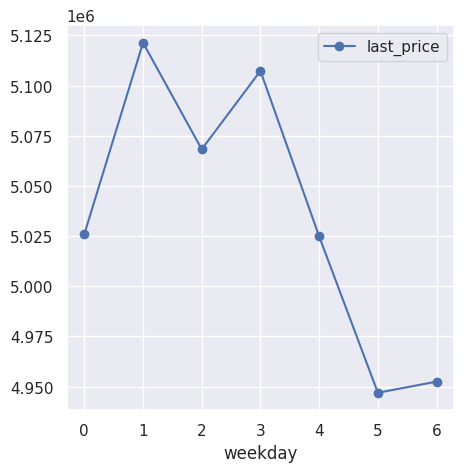

Месяц размещения 



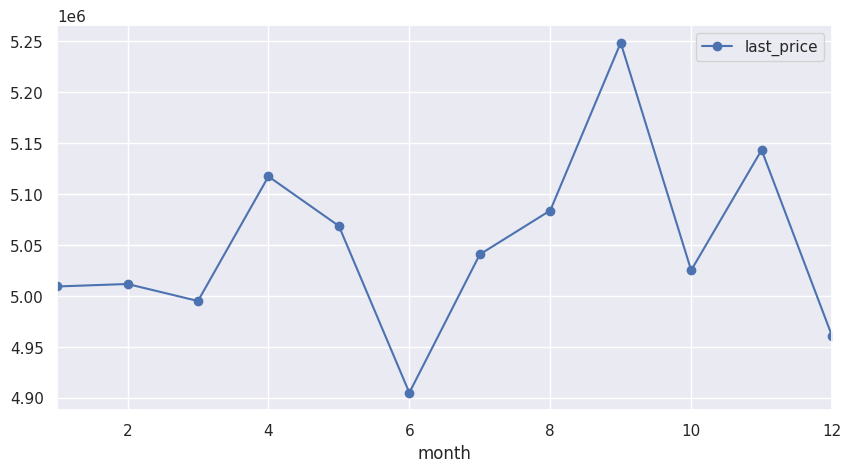

Год размещения 



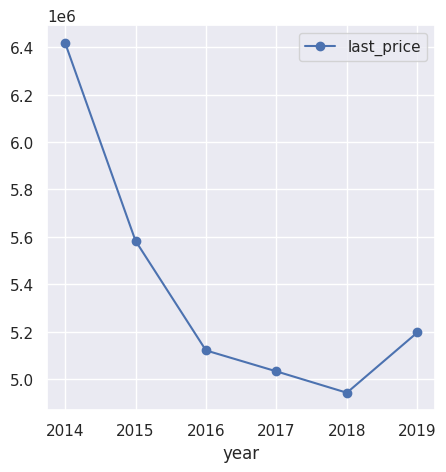

In [97]:
# Зависимость цены от общей площади
print('Зависимость цены от общей площади','\n')
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

# Зависимость цены от жилой площади
print('Зависимость цены от жилой площади','\n')
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()


# Зависимость цены от площади кухни
print('Зависимость цены от площади кухни','\n')
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()



# Зависимость цены от числа комнат
print('Зависимость цены от числа комнат','\n')
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


# Зависимость цены от этажа
print('Категории этажей','\n')
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


# Зависимость от дня размещения
print('День размещения','\n')
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


# Зависимость от месяца размещения
print('Месяц размещения','\n')
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()


# Зависимость от года размещения
print('Год размещения','\n')
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()



Построим тепловую карту корреляции по столбцу last_price, чтобы выявить параметры, которые оказывают наибольшее влияние на стоимость картиры.

<ipython-input-98-c2cbad393b0d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(data.corr())
<ipython-input-98-c2cbad393b0d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


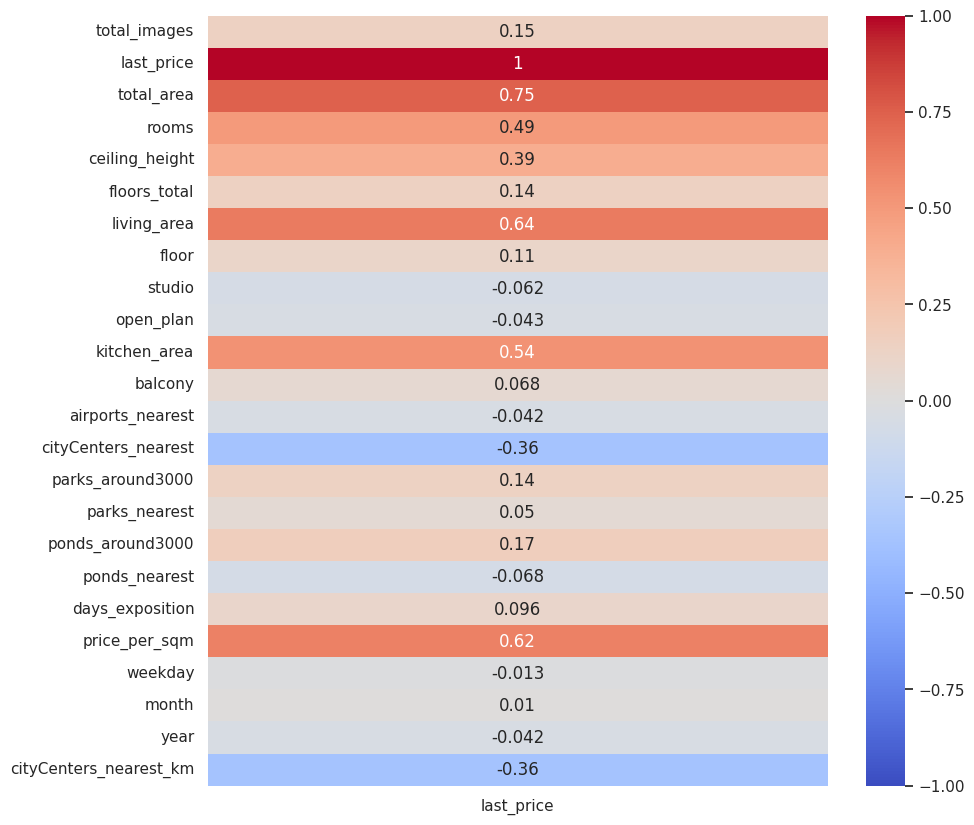

In [98]:
import numpy as np
plt.figure(figsize=(10,10))
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

Рассмотрим подробнее цены по годам, учитывая другие факторы, которые также изменяются с годами: площадь и кол-во объявлений о продаже

In [99]:
year_changes= data.pivot_table(index='year', values=['days_exposition', 'total_area', 'last_price'], aggfunc=['mean', 'median', 'count'])
year_changes.reset_index(inplace=True)
year_changes

year            mean                                   median             \
        days_exposition    last_price total_area days_exposition last_price   
0  2014      806.050000  6.418453e+06  66.188750           760.0    5785000   
1  2015      604.187171  5.583748e+06  60.644732           549.0    4980000   
2  2016      320.952249  5.121810e+06  56.414807           234.5    4370000   
3  2017      156.038759  5.033503e+06  54.799251           101.0    4350000   
4  2018       92.993538  4.943385e+06  52.885966            62.0    4400000   
5  2019       30.946206  5.197491e+06  50.925802            23.0    4700000   

                       count                        
  total_area days_exposition last_price total_area  
0       63.1              80         80         80  
1       56.0             951        951        951  
2       51.0            2534       2534       2534  
3       50.0            7508       7508       7508  
4       48.0            7273       7273       7273  
5       46.8            1041       1041       1041

**Выводы**


<div>

* <b>зависимость цены от общей площади:</b> корреляция цены и общей площади квартиры ожидаемо высока, что и видно на графике. Чем больше общая площадь - тем больше цена квартиры

* <b>зависимость цены от жилой площади:</b> зависимость чуть меньше, чем от общей площади, но все так же очевида

* <b>зависимость цены от площади кухни:</b> есть слабая положительная зависимость

* <b>зависимость цены от количества комнат:</b> есть положительная зависимость. Обычно, чем больше комнат, тем больше стоимость. Но нужно еще учитывать их размер

* <b>зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):</b> ожидаемо, что квартиры на первом этаже значительно дешевле других вариантов, и немного дешевле, чем квартиры на последнем этаже

* <b>зависимость цены от даты размещения (день недели, месяц, год):</b> самые дорогие квартиры размещены во вторник, самые дешевые - в субботу; самые дорогие квартиры размещены в апреле и в сентябре, самые дешевые - в июне;  

* <b>зависимость цены от года, учитывая площадь и кол-во объявлений</b> самые дорогие квартиры размещены в 2014 году, самые дешевые - в 2016, 2017 и в 2018 годах. В 2014 году квартиры покупали дольше, чем во все другие года (в среднем продажа квартиры занимала примерно 700-800 дней) а средние цены были высокими. Возможно это связано с кризисом 2014 года. Но у нас недостаточно данных для анализа и сравнения с другими годами, всего 80 закрытых объявлений за 2014 год. В 2015 году среднее время продажи составило примерно полтора года, а средняя стоимость квартир была 5.5 миллионов. Затем, с 2016 по 2018 спрос резко увеличился. Средняя площадь продаваемой недвижимости уменьшилась, а за ней и цена, а срок продажи становились значительно меньше с каждым годом. Это связано с тем, что в эти год был рост развития предпринимательской деятельности, на рынок ИТ-торговли недвижимостью пришел массовый продавец. В 2019 году у нас не полные данные (1041 закрытых объявлений): средняя стоимость недвижимости составила в среднем около 5.2 миллиона за квартиру, а предложение находит своего покупателя в среднем за месяц.
    

</div>

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

In [100]:
top_ten_city = data['locality_name'].value_counts().head(10)
top_ten_city_sqm_price = data.query('locality_name in (@top_ten_city.index)').pivot_table(values='price_per_sqm', 
                                                                                          index='locality_name')
top_ten_city_sqm_price = top_ten_city_sqm_price.astype(int)
top_ten_city_sqm_price.sort_values('price_per_sqm', ascending=False)

,price_per_sqm
locality_name,
Санкт-Петербург,105826
Пушкин,100542
деревня Кудрово,92481
посёлок Парголово,89591
посёлок Мурино,85677
посёлок Шушары,77847
Колпино,74763
Гатчина,67938
Всеволожск,66920


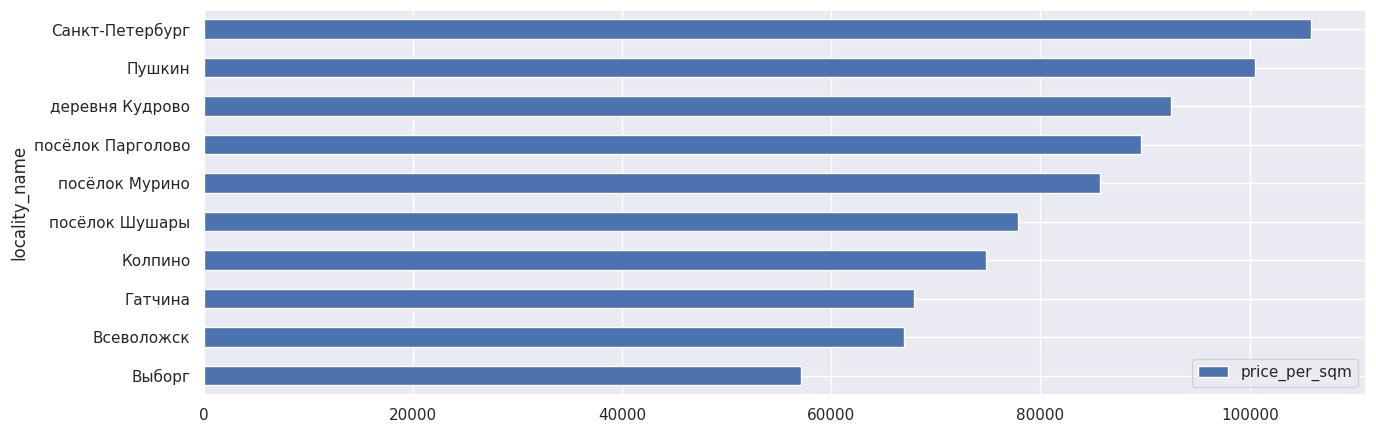

In [101]:
top_ten_city_sqm_price.sort_values('price_per_sqm').plot.barh(figsize=(15,5));

**Вывод**

Больше всего стоимость квадратного метра жилья в Санкт-Петербурге, как и ожидалось. А меньше всего - в Выборге

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [102]:
spb = data[data['locality_name'] == 'Санкт-Петербург']

In [103]:
spb_pivot = spb.pivot_table(index='cityCenters_nearest_km', values='price_per_sqm', aggfunc='mean')
spb_pivot

,price_per_sqm
cityCenters_nearest_km,
0.0,124302.790909
1.0,121226.987500
2.0,119986.355789
3.0,107448.358650
4.0,117268.590063
5.0,121777.163912
6.0,123366.153317
7.0,118254.857090
8.0,117559.709051


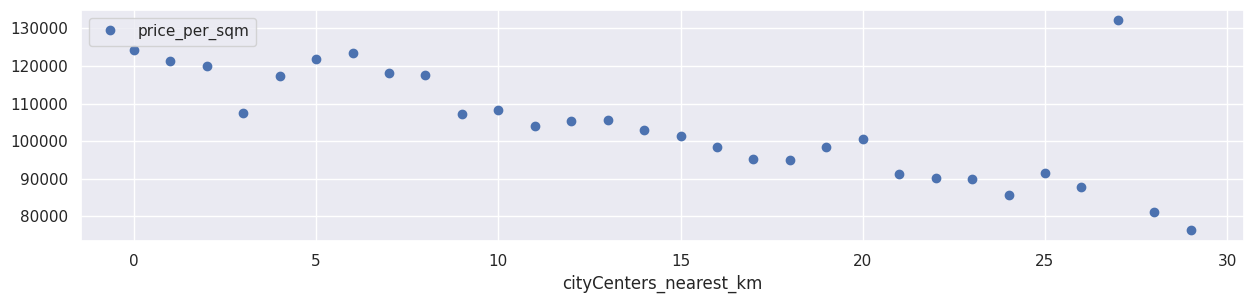

Корреляция цены и расстояния до центра: 

                        cityCenters_nearest_km  last_price
cityCenters_nearest_km                1.000000    0.557446
last_price                            0.557446    1.000000 



In [104]:
# Зависимость цены от расстояния до центра
spb_pivot.plot(grid=True, style='o', figsize=(15, 3))
plt.show()
print('Корреляция цены и расстояния до центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest_km', 'last_price']).corr(),'\n')

Стоит изучить записи, которые привели к выбросу на 27-м км.

In [105]:
spb_27km=spb[spb['cityCenters_nearest_km'] == 27]
spb_27km

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_short,price_per_sqm,weekday,month,year,cityCenters_nearest_km,floor_category
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,NaN,...,0.0,NaN,128,Санкт-Петербург,193918.9,1,11,2017,27.0,другой
5961,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,NaN,...,0.0,NaN,178,Санкт-Петербург,70312.5,1,2,2018,27.0,последний


Странные значения по цене на 27 километре от центра связаны с тем, что тут находится очень дорогой объект, стоимость которого составляет около 194 тысяч за квадратный метр.

Стоит также посмотреть на количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м и 5-ом км и какую долю они занимают, чтобы объяснить пик и провал в центре

In [106]:
spb_3km=spb[spb['cityCenters_nearest_km'] == 3]
spb_3km

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_short,price_per_sqm,weekday,month,year,cityCenters_nearest_km,floor_category
99,32,9600000,90.0,2017-09-26,4,2.55,5,67.0,2,NaN,...,0.0,NaN,104,Санкт-Петербург,106666.7,1,9,2017,3.0,другой
138,8,4800000,40.0,2017-11-18,2,2.80,3,29.0,2,NaN,...,2.0,729.0,80,Санкт-Петербург,120000.0,5,11,2017,3.0,другой
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,NaN,...,1.0,838.0,38,Санкт-Петербург,102500.0,1,11,2018,3.0,другой
201,5,10880000,123.1,2015-11-12,6,3.20,5,89.0,2,NaN,...,0.0,NaN,992,Санкт-Петербург,88383.4,3,11,2015,3.0,другой
316,11,5650000,46.3,2017-03-13,2,3.00,6,28.8,2,NaN,...,0.0,NaN,89,Санкт-Петербург,122030.2,0,3,2017,3.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23176,2,6800000,69.2,2017-11-14,3,2.90,5,39.9,4,NaN,...,1.0,666.0,447,Санкт-Петербург,98265.9,1,11,2017,3.0,другой
23178,7,5950000,60.0,2018-02-01,3,2.80,5,42.0,1,NaN,...,0.0,NaN,85,Санкт-Петербург,99166.7,3,2,2018,3.0,первый
23387,7,5600000,50.0,2017-08-21,1,2.55,5,27.0,1,NaN,...,3.0,56.0,45,Санкт-Петербург,112000.0,0,8,2017,3.0,первый
23430,18,5260000,38.0,2018-11-06,1,3.30,5,16.0,1,NaN,...,1.0,466.0,12,Санкт-Петербург,138421.1,1,11,2018,3.0,первый


In [107]:
spb_3km.pivot_table(index='floor_category', values='price_per_sqm', aggfunc=['mean', 'count'])

,mean,count
,price_per_sqm,price_per_sqm
floor_category,,
другой,108554.890580,138
первый,102520.790476,42
последний,108400.226316,57


Как мы выяснили ранее, квартиры на первом и последнем этажах значтельно дешевле, чем на других. Посмотрим, какова их доля среди всех квартир на расстояни 3 км от центра

In [108]:
(42+57) / (138+42+57) * 100

41.77215189873418

Сделаем такие же расчеты для квартир на 5-ом километре от центра

In [109]:
spb_5km=data[data['cityCenters_nearest_km'] == 5]
spb_5km

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_short,price_per_sqm,weekday,month,year,cityCenters_nearest_km,floor_category
159,14,7050000,66.0,2017-09-04,3,3.00,4,37.8,4,False,...,1.0,1013.0,98,Санкт-Петербург,106818.2,0,9,2017,5.0,последний
219,12,7700000,58.7,2017-12-12,1,3.00,7,17.0,3,NaN,...,0.0,NaN,136,Санкт-Петербург,131175.5,1,12,2017,5.0,другой
318,12,9990000,67.0,2017-07-10,1,2.84,9,37.0,7,NaN,...,1.0,713.0,50,Санкт-Петербург,149104.5,0,7,2017,5.0,другой
320,2,12734000,97.0,2016-01-30,3,2.60,10,51.2,7,NaN,...,1.0,874.0,195,Санкт-Петербург,131278.4,5,1,2016,5.0,другой
323,6,9591727,72.0,2017-06-29,2,2.80,10,34.0,9,NaN,...,1.0,534.0,118,Санкт-Петербург,133218.4,3,6,2017,5.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23536,8,6080000,70.0,2018-10-12,3,3.00,4,44.4,4,NaN,...,0.0,NaN,69,Санкт-Петербург,86857.1,4,10,2018,5.0,последний
23559,20,13800000,108.6,2016-09-12,3,2.75,19,70.6,7,NaN,...,1.0,503.0,354,Санкт-Петербург,127071.8,0,9,2016,5.0,другой
23588,7,8100000,69.0,2015-10-14,2,2.60,10,NaN,8,NaN,...,1.0,874.0,823,Санкт-Петербург,117391.3,2,10,2015,5.0,другой
23664,5,9000000,110.0,2015-12-10,4,3.36,7,64.6,5,NaN,...,1.0,118.0,816,Санкт-Петербург,81818.2,3,12,2015,5.0,другой


In [110]:
spb_5km.pivot_table(index='floor_category', values='price_per_sqm', aggfunc=['mean', 'count'])

,mean,count
,price_per_sqm,price_per_sqm
floor_category,,
другой,123976.343080,448
первый,107199.866129,62
последний,120795.961446,83


In [111]:
(62+83) / (448+62+83) * 100

24.45193929173693

Теперь мы можем объяснить, с чем связаны провал и пик по цене за кв. м. на расстояниях 3 и 5 км. от центра соответственно. Как видно из расчетов, на 3-ем километре 42% квартир находятся на первом или последнем этаже, поэтому здесь есть просадка в стоимости. А на 5-ом километре доля таких квартир уже гораздо меньше (24%), отсюда и пик по цене

**Вывод**

По полученным данным видим, что за исключением нескольких странных значений, которые были изучены выше, есть признаки отрицательной корреляции: чем больше расстояние от центра, тем меньше цена.

### Общий вывод

**Предобработка данных**

В результате работы над полученными данными, были устранены основные недостатки в их содержании. Обработаны пустые значения, заменены дубликаты, проведена работа с типами данных и аномальными значениями. Добавлены новые столбцы, часть данных была сгруппирована по категориям.

**Исследовательский анализ данных**

Был проведен исследовательский анализ данных, в результате которого были подробно рассмотрены несколько параметров квартир, построены графики.

****

**Сроки продажи квартиры**

Среднее время продажи квартиры - 110 дней, а медианное - 66. По полученным данным и гистограмме можно сказать, что быстрыми продажами являются те, которые были осуществленны в срок 19 дней и меньше. Долгие продажи - от 160 дней и дольше.

**Факторы, больше всего влияющие на общую (полную) стоимость объекта**

Из рассмотренных факторов, больше всего на стоимость квартиры влияет общая площадь. Чуть меньше - жилая площадь и площадь кухни. Число комнат тоже имеет значение, но нужно иметь ввиду, что бывают квартиры с меньшим числом комнат, но эти комнаты больше по размеру. 
Квартиры на первом этаже стоят значительно дешевле, чем на других этажах (кроме последнего)

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Больше всего стоимость квадратного метра жилья в Санкт-Петербурге (105686), меньше всего - в Выборге (58225).

**Зависимость стоимости объектов от расстояния до центра города.**

Есть признаки отрицательной корреляции: чем больше расстояние от центра, тем меньше цена. Были исследованы и определены причины аномальных значений на расстоянии 27 км. от центра, а так же провал и пик по цене на значениях 3 км и 5 км от центра соответственно